# Sommaire :


### <a href="#C1"> **Partie 1 : Contexte et Objectifs**</a>

 - Contexte
 - Objectifs

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> Import des packages</a>
 - <a href="#C22"> Repertoire de travail</a>
 - <a href="#C23"> Changement du répertoire courant</a>
 - <a href="#C24"> Import des datas frames</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</a>
 - <a href="#C31"> Display</a>
 - <a href="#C32"> Structure du dataframes</a>
 - <a href="#C33"> Les valeurs manquantes et les doublons du dataframes</a>
 - <a href="#C34"> Data inspections</a>
 - <a href="#C35"> Data Visualisation Multivariée</a>
 - <a href="#C36"> Normalité </a>
    
<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Cleaning**</a>
 - <a href="#C41"> Encoding object colonnes (LabelEncoding/OrdinalEncoder/OneHotEncoding)</a>
 - <a href="#C42"> Rename columns</a>
 - <a href="#C43"> Drop useless columns</a>
 - <a href="#C44"> Export csv</a>
 
<b><hr></b>

### <a href="#C5"> **Partie 5 : Conclusion**</a>


# <a name="C1">**Partie 1 : Contexte et Objectifs**</a> 

Contexte

Objectifs

In [1]:
from platform import python_version

print(python_version())

3.9.16


# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [2]:
# Built-in
import os, warnings 

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
#%matplotlib inline

#Preprocessing
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,StandardScaler,MinMaxScaler

#metrics
#from sklearn.metrics import mean_squared_error,mean_absolute_error

# feature selection
#from sklearn.feature_selection import VarianceThreshold
#from scipy.stats import entropy

# NLP
import nltk #/!\ attention use nltk.download('punkt')
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import words, stopwords
import spacy
import re

#cluster
from sklearn.cluster import AgglomerativeClustering, KMeans,MiniBatchKMeans, DBSCAN,MeanShift,SpectralClustering,Birch
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

#metrics
from sklearn.metrics import (mean_squared_error, silhouette_samples,silhouette_score,davies_bouldin_score,
                             adjusted_rand_score,adjusted_mutual_info_score,pair_confusion_matrix)


# Scrapping
#import scrapy
#import bs4

from pandarallel import pandarallel

###### <b><font color='blue'>2.1.2 Downloads and Options</font></b>

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eleor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eleor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eleor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\eleor\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\eleor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
# La cpu_count méthode est utilisée pour renvoyer le nombre actuel de CPU logiques dans le système.
import psutil
print("The number of physical cores in the system is %s" % (psutil.cpu_count(logical=False),))
print("The number of logical cores in the system is %s" % (psutil.cpu_count(logical=True),))

The number of physical cores in the system is 4
The number of logical cores in the system is 8


In [5]:
# pandarallel
# Ne fonctionne pas
pandarallel.initialize(progress_bar= True,
                      # nb_workers = 3,
                       #verbose = 1
                      )

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [6]:
# init sns
sns.set()

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [7]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '00_EDA.ipynb',
 'Classifiez automatiquement des biens de consommation_Images_CNN_Transfer_Learning_Stage_2_supervised_classification_V1.0 (1).ipynb',
 'Classifiez automatiquement des biens de consommation_Images_CNN_Transfer_Learning_Stage_2_supervised_classification_V1.0 (2).ipynb',
 'data',
 'OC-DS-P6-Classifiez-automatiquement-des-biens-de-consommation.ipynb',
 'README.md',
 'stop_words.pkl']

In [8]:
os.listdir('data/source')

['flipkart_com-ecommerce_sample_1050.csv', 'raw_folder_image']

In [9]:
path = 'data/source/'
# A completer
filename = 'flipkart_com-ecommerce_sample_1050.csv'

### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [10]:
df = pd.read_csv(path+filename,encoding='utf-8')
df.shape

(1050, 15)

In [11]:
del filename, path

# <a name="C3"><font color='teal'>**Partie 3 : Analyse exploratoire et etude des jeux de données EDA**</font></a> 

### <a name="C31"><font color='teal'>3.1 Display</font></a>

In [12]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [13]:
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
981,86089ddd9f9e52127ce838f210f776d7,2016-04-01 10:31:02 +0000,http://www.flipkart.com/aarika-self-design-kur...,Aarika Self Design Kurta & Patiyala,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",SWDEDPG6MRQ26TFV,2999.0,1499.0,86089ddd9f9e52127ce838f210f776d7.jpg,False,Specifications of Aarika Self Design Kurta & P...,No rating available,No rating available,Aarika,"{""product_specification""=>[{""key""=>""Dupatta Fa..."
873,159b45e4dede207f28319bf1cacee3bc,2015-12-20 08:26:17 +0000,http://www.flipkart.com/msenterprises-floral-c...,MSenterprises Floral Cushions Cover,"[""Home Furnishing >> Living""]",CPCEDGM4RPXJHBHG,1299.0,580.0,159b45e4dede207f28319bf1cacee3bc.jpg,False,MSenterprises Floral Cushions Cover (Pack of 5...,No rating available,No rating available,MSenterprises,"{""product_specification""=>[{""key""=>""Closure"", ..."
418,1d829e0eac91d7e85cdd6d581c363360,2015-12-01 06:13:00 +0000,http://www.flipkart.com/denim-deo-original-pas...,Denim Deo Original & Passion 150ml Gift Set C...,"[""Beauty and Personal Care >> Fragrances >> De...",CAGE9B78AVRWXHGD,390.0,390.0,1d829e0eac91d7e85cdd6d581c363360.jpg,False,Flipkart.com: Buy Denim Deo Original & Passion...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Gift Set C..."
119,db6c79a1d852944a89e157793f392d67,2016-05-12 14:18:51 +0000,http://www.flipkart.com/frenemy-mpad271-mousep...,FRENEMY MPAD271 Mousepad,"[""Computers >> Laptop Accessories >> Mouse Pad...",ACCEGCASDTW8AW4G,399.0,169.0,db6c79a1d852944a89e157793f392d67.jpg,False,Key Features of FRENEMY MPAD271 Mousepad smoot...,No rating available,No rating available,FRENEMY,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
596,e4922f01eda047582cd72e9d1063ab7a,2016-02-25 09:50:31 +0000,http://www.flipkart.com/v-creations-bonsai-cac...,V Creations Bonsai Cactus Artificial Plant wi...,"[""Home Decor & Festive Needs >> Flowers, Plant...",ARPEFYZQ7PZSTFFS,1575.0,725.0,e4922f01eda047582cd72e9d1063ab7a.jpg,False,Specifications of V Creations Bonsai Cactus Ar...,No rating available,No rating available,V Creations,"{""product_specification""=>[{""key""=>""Sales Pack..."


### <a name="C32"><font color='teal'>3.2 Structure du dataframe</font></a> 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [15]:
df.dtypes.value_counts()

object     12
float64     2
bool        1
dtype: int64

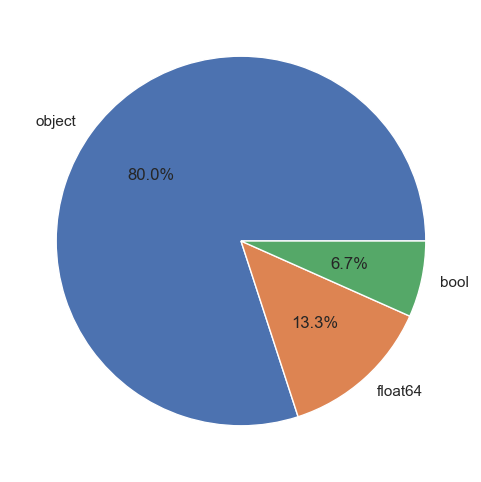

In [16]:
labels = ["object", "float64", "bool"]
fig, ax = plt.subplots(1,1, figsize = (20, 6))
ax.pie(df.dtypes.value_counts(normalize=True), labels=labels, autopct='%1.1f%%')
del labels;

In [17]:
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

### <a name="C33"><font color='teal'>3.3 Les valeurs manquantes et les doublons du dataframes</font></a> 

#### <font color='teal'>3.3.a Analyse des doublons du dataframes</font>

In [18]:
print("Il y a {} lignes dupliquées".format(df.duplicated().sum()))

Il y a 0 lignes dupliquées


In [19]:
print("Il y a {} lignes dupliquées".format( df.drop(columns="uniq_id").duplicated().sum() ))
print("Il y a {} clés primaires dupliquées".format( df["uniq_id"].duplicated().sum() ))

Il y a 0 lignes dupliquées
Il y a 0 clés primaires dupliquées


In [20]:
for col in df.columns:
    n = df.duplicated(subset=col).sum()
    print(f"col : {col} -> duplicated : {n}" )

col : uniq_id -> duplicated : 0
col : crawl_timestamp -> duplicated : 901
col : product_url -> duplicated : 0
col : product_name -> duplicated : 0
col : product_category_tree -> duplicated : 408
col : pid -> duplicated : 0
col : retail_price -> duplicated : 695
col : discounted_price -> duplicated : 625
col : image -> duplicated : 0
col : is_FK_Advantage_product -> duplicated : 1048
col : description -> duplicated : 0
col : product_rating -> duplicated : 1023
col : overall_rating -> duplicated : 1023
col : brand -> duplicated : 559
col : product_specifications -> duplicated : 65


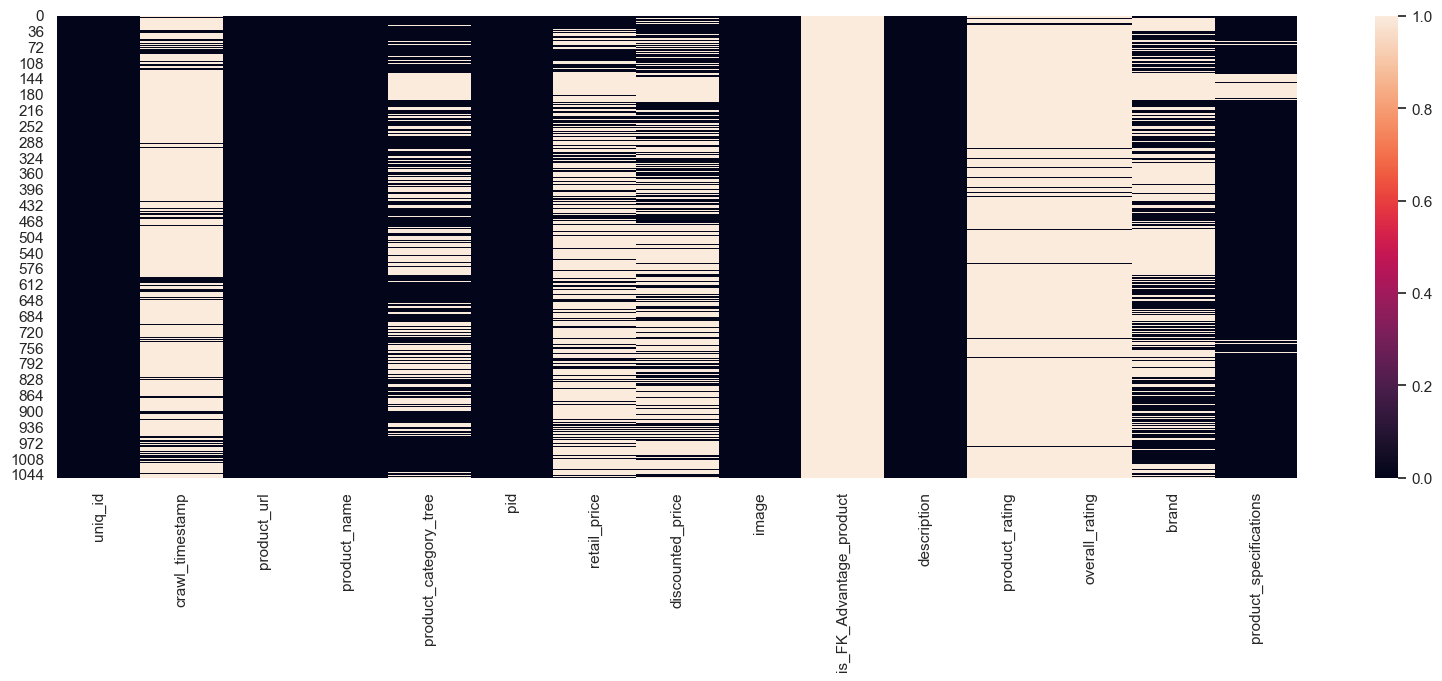

In [21]:
fig, ax = plt.subplots(1,1, figsize = (20, 6))
sns.heatmap( df.apply(lambda x: x.duplicated()) );

#### <font color='teal'>3.3.b Analyse et Traitement des valeurs manquantes du dataframes</font>

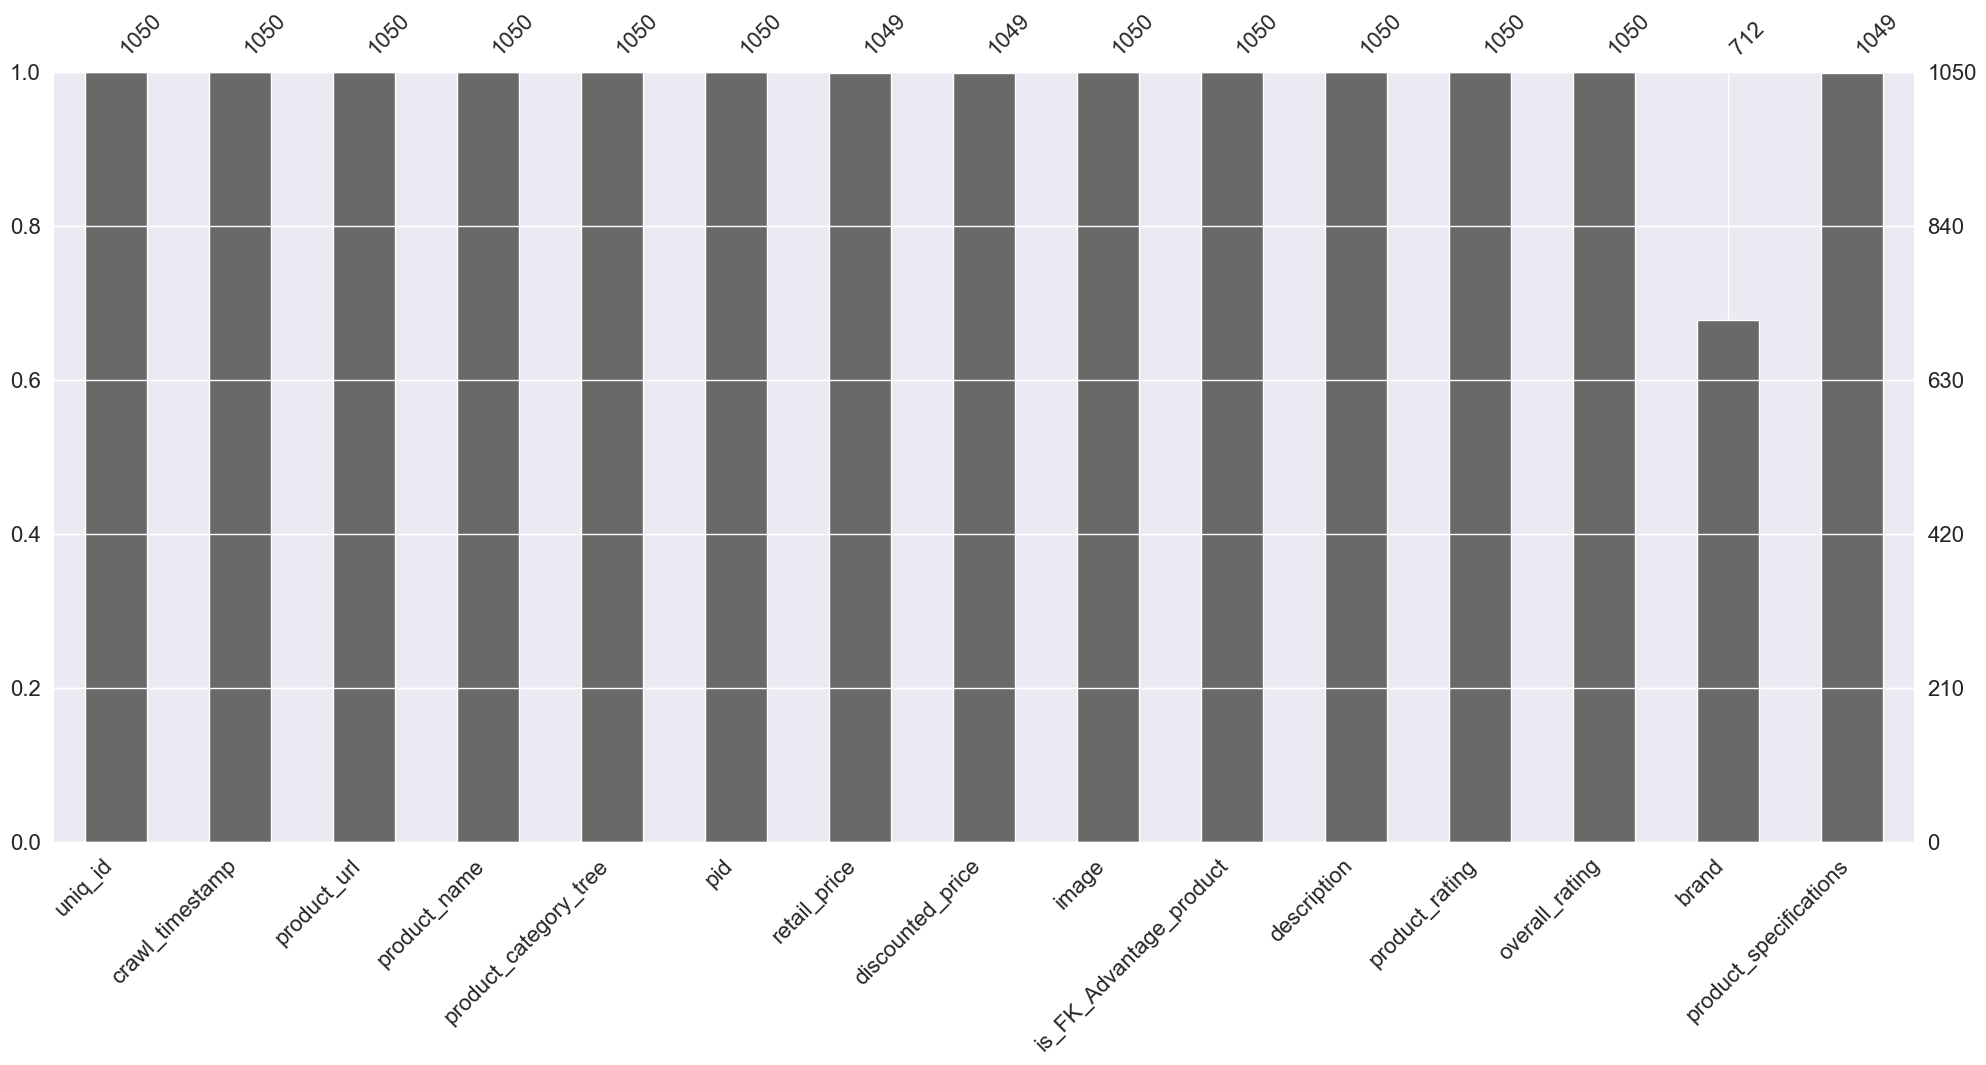

In [22]:
#les variables misc_data
import missingno as msno
msno.bar(df);

In [23]:
def compute_nb_mising_values(data):
    """
    Cree un dataframe pandas qui contient le nombre de valeurs par colonnes de l'argument data
    """
    valeurs = {}
    
    for col in data.columns:
        valeurs[col] = []
        valeurs[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        valeurs[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=valeurs, orient='index',
                                  columns = ["Taux de valeurs non nulles", "Nombre de valeurs manquantes"]
                                 ).sort_values(by="Nombre de valeurs manquantes",ascending=True)

In [24]:
compute_nb_mising_values(df)

,Taux de valeurs non nulles,Nombre de valeurs manquantes
uniq_id,100.00,0
crawl_timestamp,100.00,0
product_url,100.00,0
product_name,100.00,0
product_category_tree,100.00,0
pid,100.00,0
image,100.00,0
is_FK_Advantage_product,100.00,0
description,100.00,0
product_rating,100.00,0


In [25]:
def drop_NA_columns(data,p):
    '''
    Select features who have more than p% if p<1 na value   
    Select feature contains more than p na value if p>1
    '''
    feature = []
    if p > 1 and p < 100:
        na_df = data.columns[data.isna().sum() > int(p)]
    
    if p <= 1 and p > 0:
        na_df = data.columns[data.isna().sum()/data.shape[0] > p]
    
    return(na_df)

In [26]:
drop_NA_columns(df,p=0.5)

Index([], dtype='object')

#### <div class="alert alert-info"><font color='teal'> Suppression des colonnes dont plus de ...% des valeurs sont manquantes </font></div>

In [27]:
def drop_NA_columns(data,p):
    '''
    Select features who have more than p% if p<1 na value   
    Select feature contains more than p na value if p>1
    '''
    feature = []
    if p > 1 and p < 100:
        na_df = data.columns[data.isna().sum() > int(p)]
    
    if p <= 1 and p > 0:
        na_df = data.columns[data.isna().sum()/data.shape[0] > p]
    
    return(na_df)

In [28]:
drop_NA_columns(df,p=0.5)

Index([], dtype='object')

In [29]:
col_to_drop = drop_NA_columns(df,p=0.5)
df.shape
del col_to_drop                

### <a name="C34"><font color='teal'>3.4 Data inspections</font></a> 

In [30]:
df.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [31]:
df.describe(exclude = [np.number]) #/include = [objet]/["category"]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,1050,2,1050,27,27,490,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,1,993,1,889,889,11,22


### <a name="C35"><font color='teal'>3.5 Data Visualisation Multivariée</font></a> 

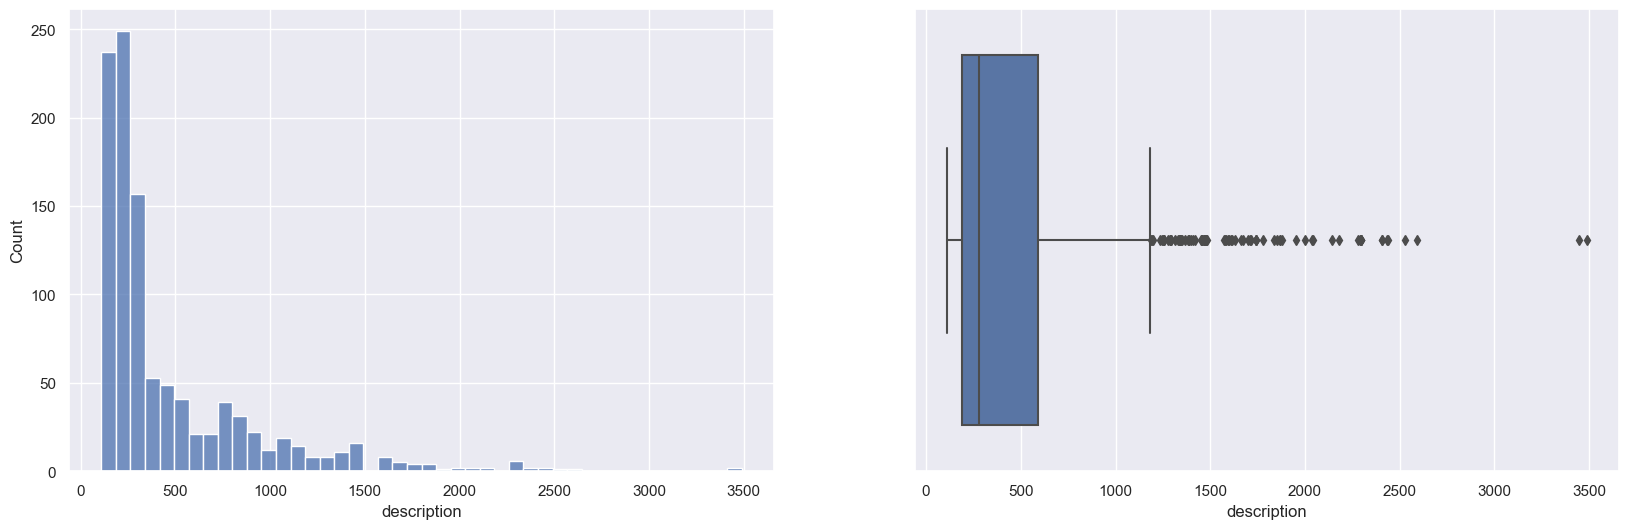

In [32]:
# Description
fig, ax = plt.subplots(1,2, figsize = (20, 6))
sns.histplot(df.description.str.len(),ax= ax[0])
sns.boxplot(x = df.description.str.len(),ax= ax[1]);

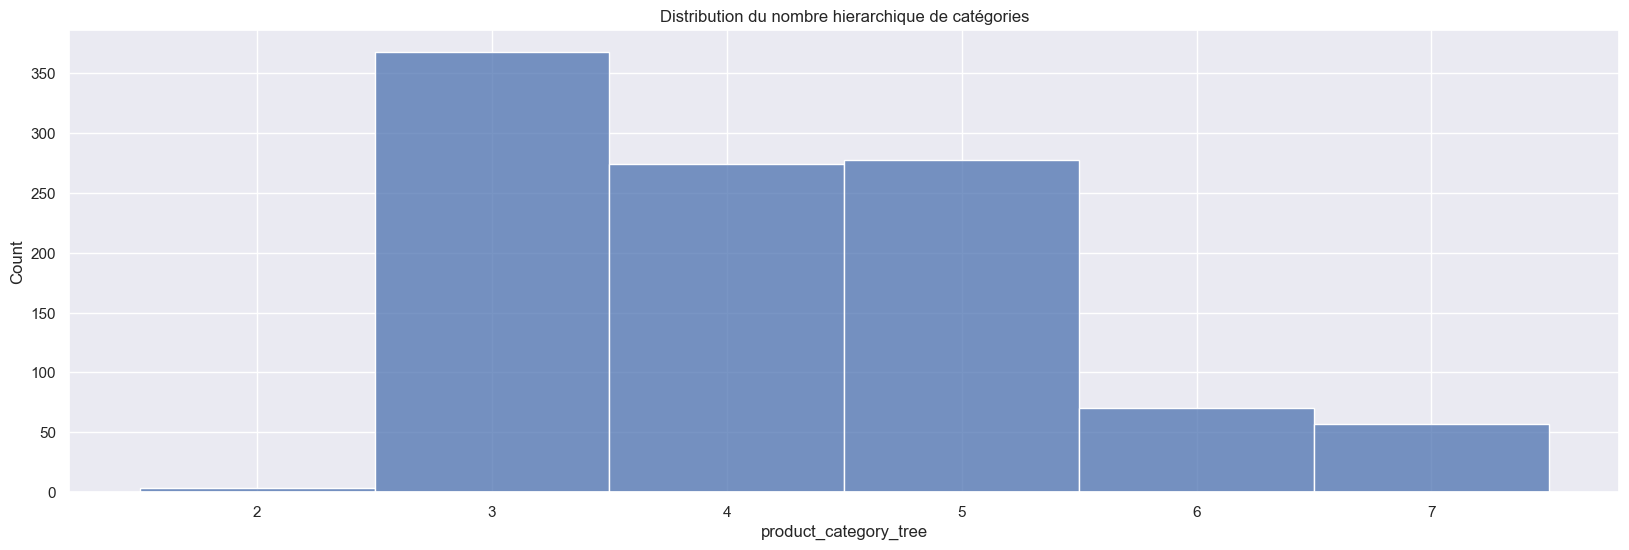

In [33]:
# product_category_tree
fig, ax = plt.subplots(1,1, figsize = (20, 6))
sns.histplot(df.product_category_tree.str.split(' >> ').apply(len),ax = ax,discrete=True)
ax.set_title("Distribution du nombre hierarchique de catégories");

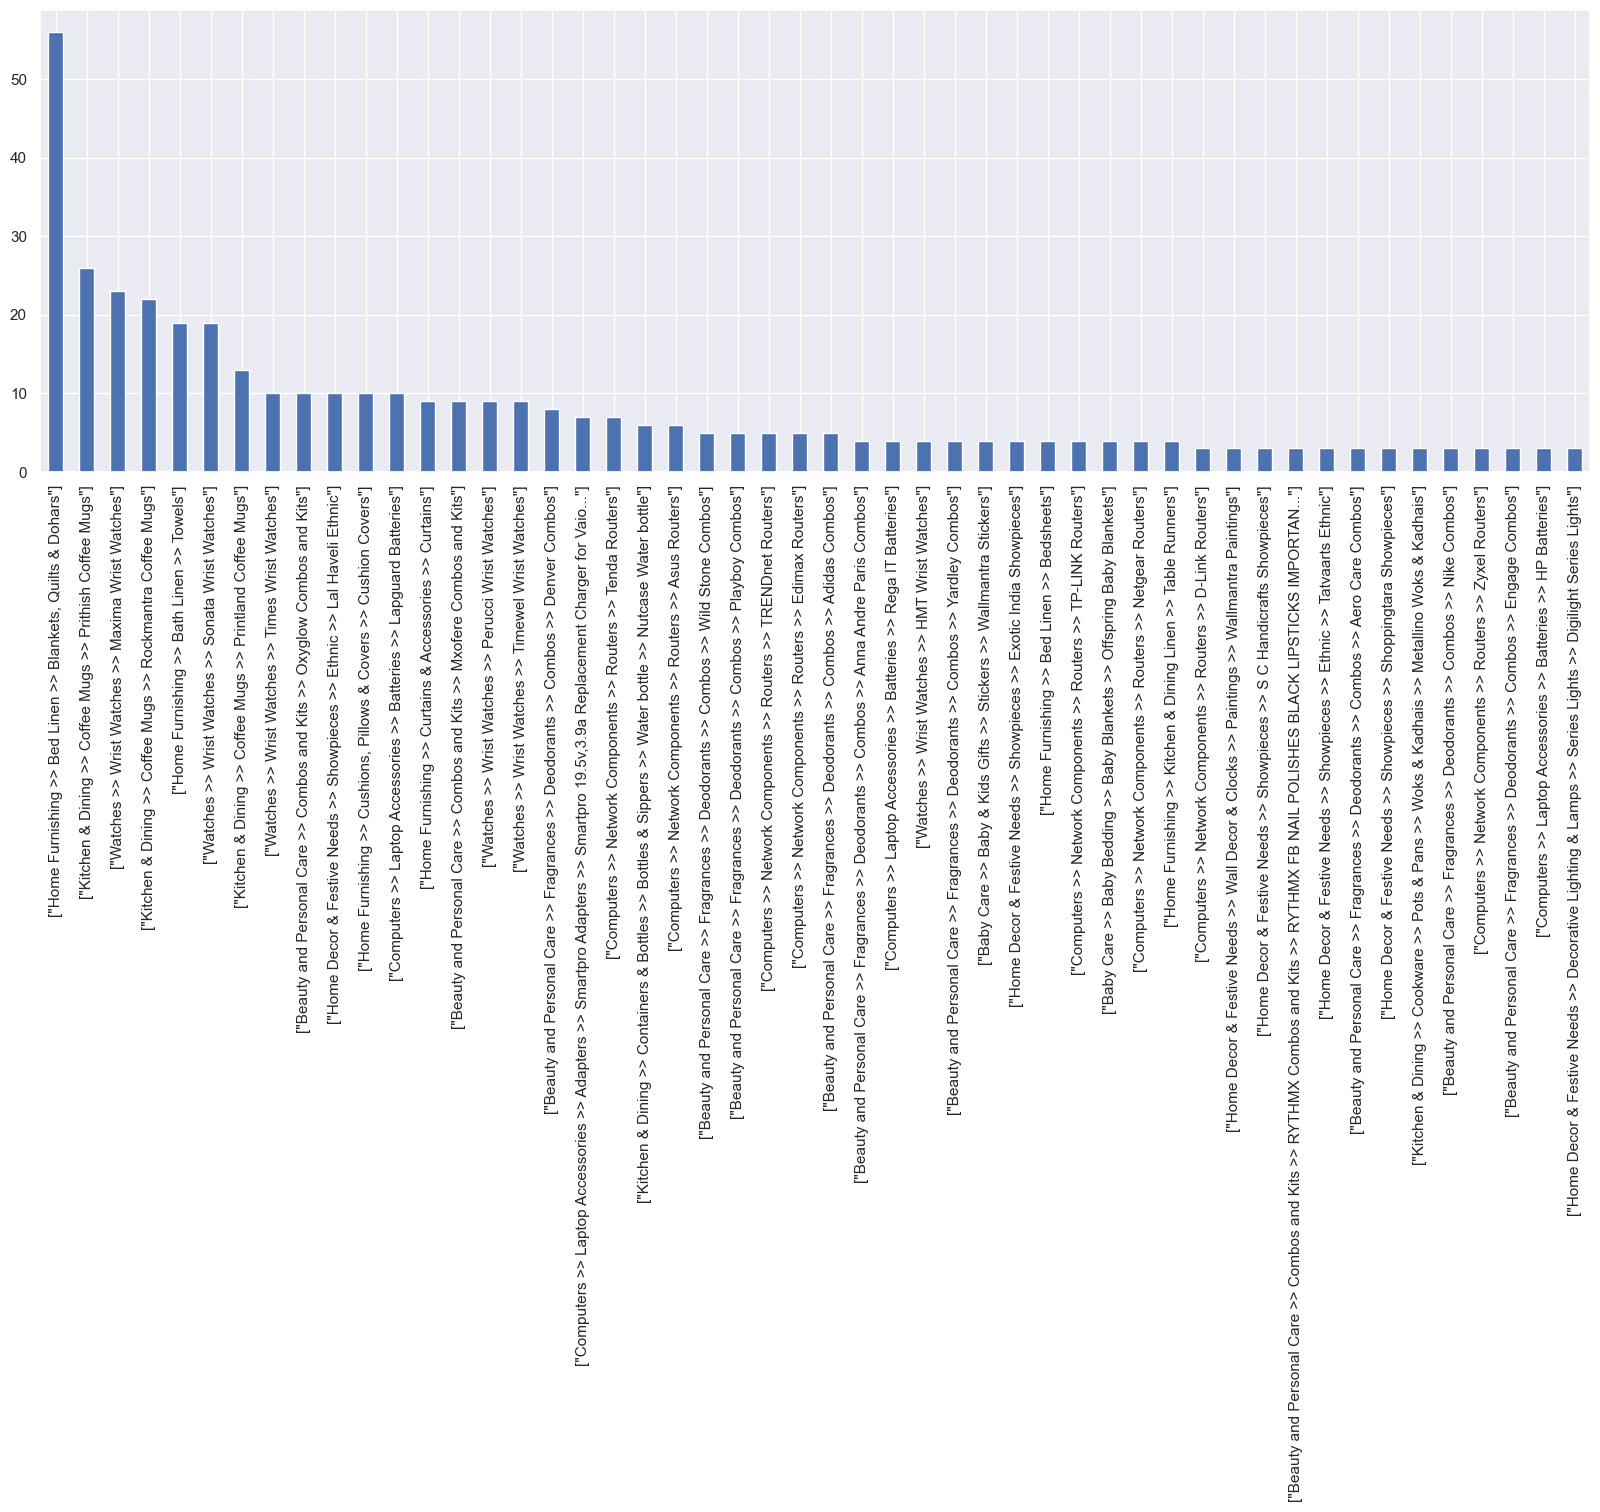

In [34]:
# product_category_tree
fig, ax = plt.subplots(1,1, figsize = (20, 6))
df.product_category_tree.value_counts().head(50).plot(kind='bar');

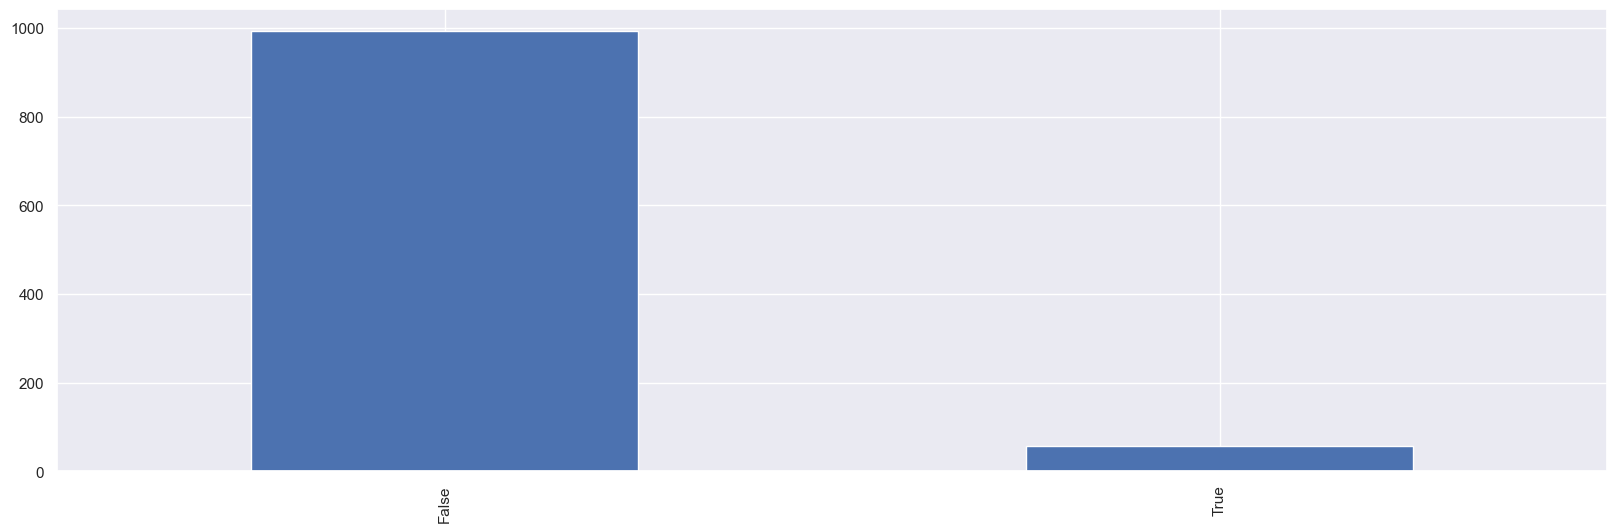

In [35]:
# is_FK_Advantage_product
fig, ax = plt.subplots(1,1, figsize = (20, 6))
df.is_FK_Advantage_product.value_counts().plot(kind='bar');

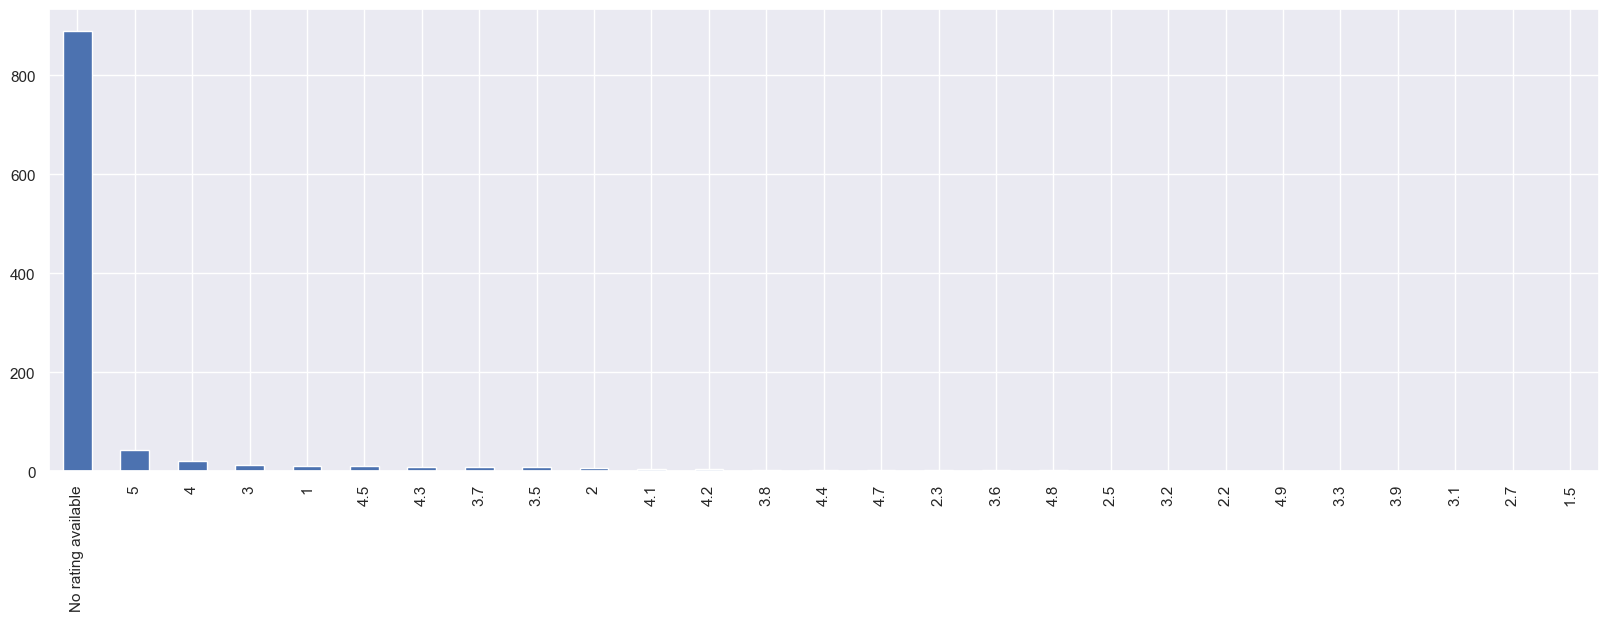

In [36]:
# product_rating
fig, ax = plt.subplots(1,1, figsize = (20, 6))
df.product_rating.value_counts().plot(kind='bar');

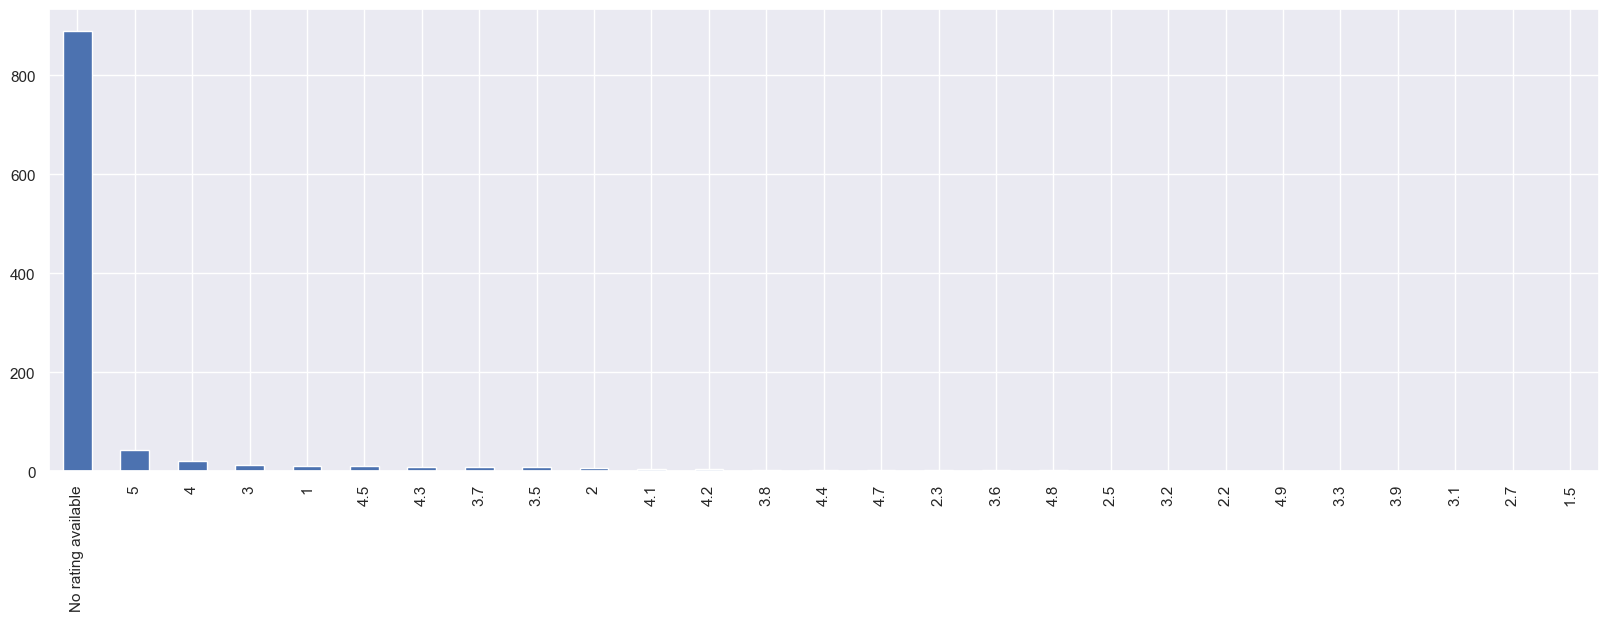

In [37]:
# overall_rating
fig, ax = plt.subplots(1,1, figsize = (20, 6))
df.overall_rating.value_counts().plot(kind='bar');

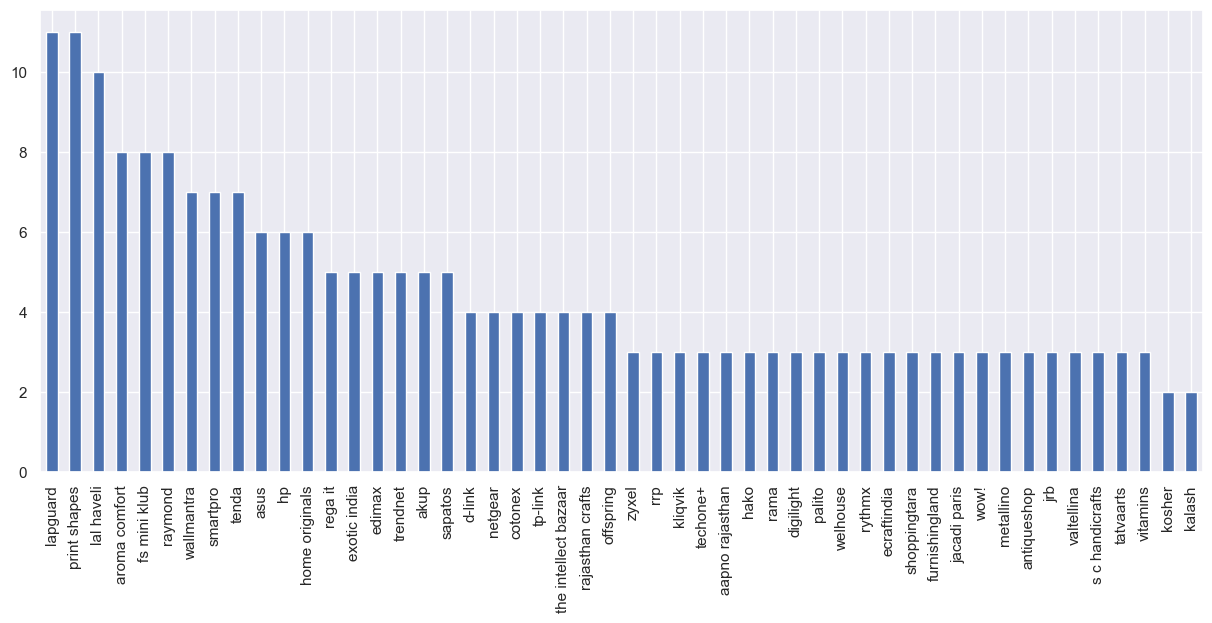

In [38]:
# brand
fig, ax = plt.subplots(1,1, figsize = (15, 6))
df.brand.str.lower().value_counts().head(50).plot(kind='bar');

### <a name="C36"><font color='teal'>3.6 Cleaning </font></a> 

#### <font color='teal'>3.6.a Select Columns</font>

In [39]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [40]:
cols = ['uniq_id', 'product_category_tree', 'description', 'pid','product_url','product_specifications','image']
df = df[cols]
df.head()
del cols

In [41]:
print("Il y a {} lignes dupliquées".format(df.duplicated().sum()))

Il y a 0 lignes dupliquées


In [42]:
print("Il y a {} lignes dupliquées".format( df.drop(columns="uniq_id").duplicated().sum() ))
print("Il y a {} clés primaires dupliquées".format( df["uniq_id"].duplicated().sum() ))

Il y a 0 lignes dupliquées
Il y a 0 clés primaires dupliquées


#### <font color='teal'>3.6.b Correction colonnes</font>

In [43]:
#url

In [44]:
df.product_url.sample().values

array(['http://www.flipkart.com/valtellina-abstract-double-blanket-brown/p/itmeedsggzmg9mgq?pid=BLAEEDSGY6APNYWQ'],
      dtype=object)

In [45]:
# Extraction Info des URL
# pattern 1 : 'http://www.flipkart.com/' (prefix)
# pattern 2 : '\\/p\\/.+$' (suffix)

pat1 = 'http://www.flipkart.com/'
pat2 = '\\/p\\/.+$'
df['_url_info'] = df.product_url.apply(lambda x: re.sub(pat1+'|'+pat2,'',x.lower() ) )
del pat1, pat2

In [46]:
for idx in df['uniq_id'].sample(5):
    print('id :',idx,' | col :',df.loc[df['uniq_id']==idx,'_url_info'].values,'| pid : ',df.loc[df['uniq_id']==idx,'product_url'].values[0].lower(),'\n')

id : 747b170919791d6111847d3485b5b77b  | col : ['good-way-peppermint-lip-balm-pepper'] | pid :  http://www.flipkart.com/good-way-peppermint-lip-balm-pepper/p/itmegakkpqyrzxt3?pid=lpbegakkcyhxzkjh 

id : 9e81a24714e06b0ca9b4fed8cae42611  | col : ['bianca-cotton-face-towel-set'] | pid :  http://www.flipkart.com/bianca-cotton-face-towel-set/p/itmec899k85ggnyf?pid=btwec899znb9xh3z 

id : 6d460d2e12ff7c84cb6b9af783d465ae  | col : ['nammababy-baby-girl-s-animal-print-top-pyjama-set'] | pid :  http://www.flipkart.com/nammababy-baby-girl-s-animal-print-top-pyjama-set/p/itmecqbq6cjqbz2x?pid=nstecqbqfgmtk9te 

id : d68b774e9529a4b94a5c6c8943a1b8b3  | col : ['pioneer-pragati-floral-single-duvet-orange'] | pid :  http://www.flipkart.com/pioneer-pragati-floral-single-duvet-orange/p/itmedan7bban7yfx?pid=blaedan7hxg3cahd 

id : e47b9f88b773b3fd97ab3b51642ff6fb  | col : ['sarah-stylish-hair-claw'] | pid :  http://www.flipkart.com/sarah-stylish-hair-claw/p/itmejuhdfyeghvnc?pid=hacejuhdm5mtpkyw 



In [47]:
df.product_category_tree.sample(5)

226    ["Home Decor & Festive Needs >> Showpieces >> ...
75     ["Baby Care >> Infant Wear >> Baby Girls' Clot...
292    ["Baby Care >> Infant Wear >> Baby Girls' Clot...
398    ["Computers >> Network Components >> Routers >...
464    ["Baby Care >> Infant Wear >> Baby Girls' Clot...
Name: product_category_tree, dtype: object

In [48]:
df.product_category_tree.str.split(">>",expand = True).isna().sum()/1050

0    0.000000
1    0.000000
2    0.002857
3    0.353333
4    0.614286
5    0.879048
6    0.945714
dtype: float64

In [49]:
# Conserver les 3 premiers colonnes

In [50]:
# extraction des categories de product_category_tree
df[['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7']] = df.product_category_tree\
.apply(lambda x: re.sub('^\\[\\"','',x.lower()) )\
.str.split(" >> ",expand = True)

df.drop(columns=['cat_4', 'cat_5', 'cat_6', 'cat_7'], inplace = True)

In [51]:
df[['image','product_category_tree','cat_1', 'cat_2', 'cat_3']].head(5)

,image,product_category_tree,cat_1,cat_2,cat_3
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >>...",home furnishing,curtains & accessories,curtains
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",baby care,baby bath & skin,baby bath towels
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",baby care,baby bath & skin,baby bath towels
3,d4684dcdc759dd9cdf41504698d737d8.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",home furnishing,bed linen,bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",home furnishing,bed linen,bedsheets


In [52]:
# Supprimer la colonne image
# df.drop(columns='image',inplace=True)

In [53]:
df.nunique()

uniq_id                   1050
product_category_tree      642
description               1050
pid                       1050
product_url               1050
product_specifications     984
image                     1050
_url_info                 1048
cat_1                        7
cat_2                       63
cat_3                      244
dtype: int64

In [54]:
df.cat_1.value_counts()

home furnishing               150
baby care                     150
watches                       150
home decor & festive needs    150
kitchen & dining              150
beauty and personal care      150
computers                     150
Name: cat_1, dtype: int64

In [55]:
pd.set_option('display.max_rows', 100)
df.cat_2.value_counts().T

wrist watches                        149
laptop accessories                    87
infant wear                           84
coffee mugs                           74
showpieces                            71
bed linen                             65
fragrances                            65
network components                    49
cookware                              27
table decor & handicrafts             27
combos and kits                       24
wall decor & clocks                   22
bath linen                            21
curtains & accessories                19
makeup                                18
baby bedding                          15
body and skin care                    15
baby & kids gifts                     15
baby bath & skin                      14
kitchen tools                         14
kitchen & dining linen                14
decorative lighting & lamps           14
containers & bottles                  13
cushions, pillows & covers            13
hair care       

In [56]:
# Supprimer des colonnes cat_2 et cat_3 car trop de categories(classes) pour peu de echantillon par classes. 
# Risque d'overfitting

df.drop(columns=['cat_2','cat_3'],inplace=True)

In [57]:
# product_specifications

In [58]:
df.product_specifications.sample().values[0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Onlinemaniya"}, {"key"=>"Type", "value"=>"Quilts and Comforters"}, {"key"=>"Hand Washable", "value"=>"No"}, {"key"=>"Model ID", "value"=>"Jaipuri Rajai"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Design", "value"=>"Circle Pattern on Front"}, {"key"=>"Machine Washable", "value"=>"No"}, {"key"=>"Suitable For", "value"=>"Stroller, Cribs"}, {"key"=>"Inner Material", "value"=>"100% Cotton"}, {"key"=>"Model Name", "value"=>"Jaipuri Rajai"}, {"key"=>"Ideal For", "value"=>"Girls"}, {"key"=>"Outer Material", "value"=>"Cotton"}, {"key"=>"Size", "value"=>"Single"}, {"key"=>"Weight", "value"=>"450 g"}, {"key"=>"Length", "value"=>"83 inch / 212 cm"}, {"key"=>"Width", "value"=>"53 inch / 135 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"1"}, {"key"=>"Sales Package", "value"=>"1 Quilt"}]}'

In [59]:
# Nombre de valeurs manquantes pour cette variable
df.product_specifications.isna().sum()

1

In [60]:
#pat1 = 'ee' 
#pat2 = 'rr'
df['spec_clean'] = df.product_specifications.apply(lambda x: re.sub('\\{\\"product_specification\\"\\=\\>\\[\\{|\\}|\\{','',str(x) ).split(',') )
#del pat1, pat2

res = dict()

for idx in df['uniq_id']:
    #print(idx)
    dico = dict()
    for row in df.loc[df.uniq_id==idx,'spec_clean']:
        for w in row:
            #print(w.strip())
            
            if w.strip()[:5]=='"key"':
                key = re.sub('"key"=>|\\"','',w.strip())
            if w.strip()[:5]=='"valu':
                value = re.sub('"value"=>|\\"','',w.strip())
                dico[key] = value      
        #print('\n')
    res[idx] = dico
                
df_spec = pd.DataFrame.from_dict(res,orient='index')   
del res, w, row, idx, dico

In [61]:
df_spec.sample(5)

,Brand,Designed For,Type,Model Name,Model ID,Color,Length,Number of Contents in Sales Package,Sales Package,Material,...,Error Check,Memory Configuration,Memory Clock,Technology,Re-usable,Area of Use,Other Traits,Acid Free,Transfer Paper,Printed Text
037c2402fee39fbc80433935711d1383,eCraftIndia,NaN,Square,NaN,NaN,Brown,NaN,Pack of 5,Wash In Normal Or Luke Warm Water.],Cotton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a7bd63ef1d3b345d7f9a162865bb7c0d,NaN,NaN,Analog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7b1c5edc85bc7e31edf49ab70034bb3a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952a100cf3a5bdf2d655e9cdca0e9dd5,Casotec,NaN,USB Cable,Lightning,272017A,Purple,NaN,Pack of 1,1 PC Cable],Rubber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ee8d9ff65e0fe4278afce7c933d30941,NaN,NaN,Analog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


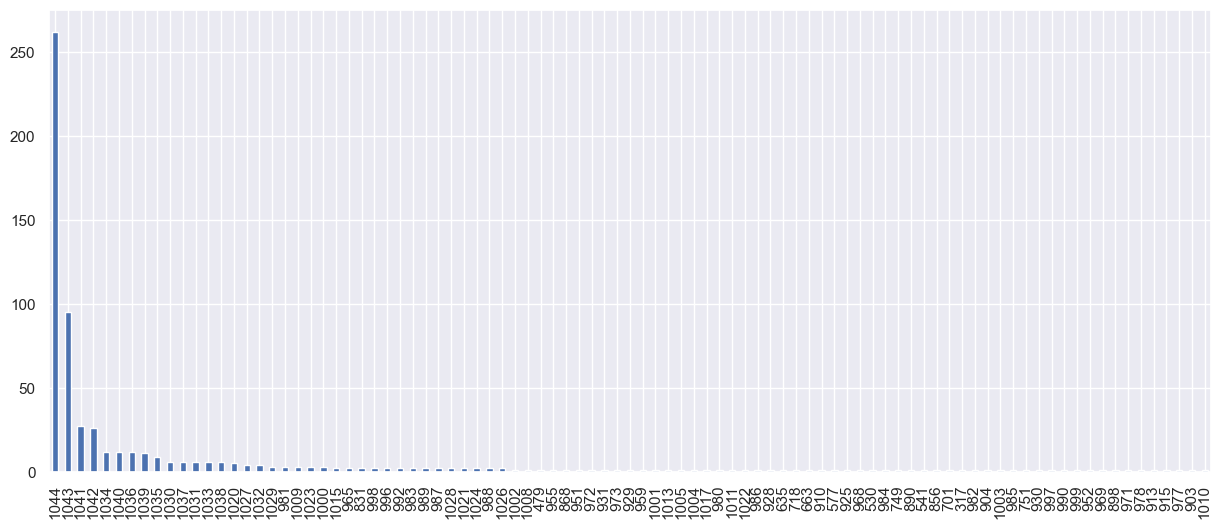

In [62]:
fig, ax = plt.subplots(1,1, figsize = (15, 6))
df_spec.isna().sum().value_counts().plot(kind='bar', ax=ax);

In [63]:
del df_spec

In [64]:
df.columns

Index(['uniq_id', 'product_category_tree', 'description', 'pid', 'product_url',
       'product_specifications', 'image', '_url_info', 'cat_1', 'spec_clean'],
      dtype='object')

In [65]:
df.drop(columns=['pid','product_url','product_specifications',
                'product_category_tree','spec_clean','_url_info'],inplace=True)

In [66]:
df.columns

Index(['uniq_id', 'description', 'image', 'cat_1'], dtype='object')

In [67]:
%whos

Variable                     Type                Data/Info
----------------------------------------------------------
AgglomerativeClustering      type                <class 'sklearn.cluster._<...>AgglomerativeClustering'>
Birch                        type                <class 'sklearn.cluster._birch.Birch'>
DBSCAN                       type                <class 'sklearn.cluster._dbscan.DBSCAN'>
EnglishStemmer               ABCMeta             <class 'nltk.stem.snowball.EnglishStemmer'>
Image                        module              <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
KMeans                       ABCMeta             <class 'sklearn.cluster._kmeans.KMeans'>
MeanShift                    type                <class 'sklearn.cluster._mean_shift.MeanShift'>
MiniBatchKMeans              ABCMeta             <class 'sklearn.cluster._kmeans.MiniBatchKMeans'>
PorterStemmer                ABCMeta             <class 'nltk.stem.porter.PorterStemmer'>
RegexpTokenizer          

### <a name="C37"><font color='teal'>3.7 Bag of words </font></a> 

In [68]:
# Library NLTK
# from nltk.tokenize import word_tokenize
doc = df.description.sample().values[0]
tokens = word_tokenize( doc )
tokens

['Buy',
 'Lapguard',
 'Acer',
 'Aspire',
 '4741G-5464G50Mn',
 'Replacement',
 '6',
 'Cell',
 'Laptop',
 'Battery',
 'only',
 'for',
 'Rs',
 '.',
 '1699',
 'from',
 'Flipkart.com',
 '.',
 'Only',
 'Genuine',
 'Products',
 '.',
 '30',
 'Day',
 'Replacement',
 'Guarantee',
 '.',
 'Free',
 'Shipping',
 '.',
 'Cash',
 'On',
 'Delivery',
 '!']

In [69]:
# Obtenir la liste des modèles pré-entraînés disponible
!python -m spacy validate


[+] Loaded compatibility table

================= Installed pipeline packages (spaCy v3.3.1) =================
[i] spaCy installation: C:\Users\eleor\anaconda3\lib\site-packages\spacy

NAME              SPACY                 VERSION      
en_core_web_sm    >=3.3.0.dev0,<3.4.0   3.3.0     [+]
fr_core_news_md   >=3.3.0.dev0,<3.4.0   3.3.0     [+]
fr_core_news_sm   >=3.3.0.dev0,<3.4.0   3.3.0     [+]



In [70]:
# Library Spacy
# Charger le modèle pré-entraîné en français
nlp = spacy.load("en_core_web_sm")

# Tokenisation avec Spacy
tokensSpacy = nlp(doc)
tokensSpacy
# Afficher chaque token
#for token in doc:
#    print(token.text)

Buy Lapguard Acer Aspire 4741G-5464G50Mn Replacement 6 Cell Laptop Battery only for Rs. 1699 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!

In [71]:
def display_tokens_info(tokens):
    """ display info about tokens"""
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}" )
    print(tokens[:30])

In [72]:
# Nltk
display_tokens_info( tokens )

nb tokens 34, nb tokens uniques 29
['Buy', 'Lapguard', 'Acer', 'Aspire', '4741G-5464G50Mn', 'Replacement', '6', 'Cell', 'Laptop', 'Battery', 'only', 'for', 'Rs', '.', '1699', 'from', 'Flipkart.com', '.', 'Only', 'Genuine', 'Products', '.', '30', 'Day', 'Replacement', 'Guarantee', '.', 'Free', 'Shipping', '.']


In [73]:
# Spacy
display_tokens_info( [tok.text for tok in tokensSpacy] )

nb tokens 34, nb tokens uniques 29
['Buy', 'Lapguard', 'Acer', 'Aspire', '4741G-5464G50Mn', 'Replacement', '6', 'Cell', 'Laptop', 'Battery', 'only', 'for', 'Rs', '.', '1699', 'from', 'Flipkart.com', '.', 'Only', 'Genuine', 'Products', '.', '30', 'Day', 'Replacement', 'Guarantee', '.', 'Free', 'Shipping', '.']


#### <b><font color='teal'> StopWords</font></b>

#####  <b><font color='teal'> telecharge la liste des stop words </br> puis merge ac la liste des mots les plus utilisés dans le corpus</font></b>

In [74]:
default = nltk.corpus.stopwords.words('english') # recuperer les stops words 'english' present par default dans la bibli
# de nltk

global stop_words
stop_words = set(default + stopwords.words('english'))
print(stop_words)

{'it', 'which', 'ours', 'having', 'before', "it's", 'each', 'and', 'did', 'yourselves', 'few', 't', 'until', 'other', 'hadn', "shan't", "you'd", 'such', "won't", 'if', 'needn', 'won', 'itself', "hasn't", 'wouldn', 'or', 'a', 'from', 'will', 'nor', 'o', 'your', 'by', 'i', 'up', 'only', 'ma', 'those', 'off', 'now', "mustn't", 'into', 'he', 'them', 'their', 'theirs', 'why', 'weren', 'here', 'because', 'me', 'down', 'an', 'wasn', 're', 'his', 's', 'do', 'below', 'couldn', 'isn', 'him', 'is', "she's", 'these', 'at', 'herself', 'being', 'too', 'm', 'no', 'where', 'all', 'through', 'when', 'over', 'not', "hadn't", "weren't", 'have', 'hers', 'own', 'my', 'that', 'both', 'under', 'doesn', 'our', 'was', 'once', 'had', 'this', 'shouldn', 'on', "wasn't", 'you', 'should', "couldn't", 'haven', "don't", 'any', 'with', 'ain', 'has', 'above', 'most', 'yours', 'then', 'further', 'its', "mightn't", 'they', "didn't", "isn't", 'of', 'between', 'more', 'just', 'myself', "you're", 'who', 'but', 'am', 'whom',

In [75]:
# Stop_words NLTK
tokens1 = [w for w in tokens if w.lower() not in stop_words]
display_tokens_info(tokens)

nb tokens 34, nb tokens uniques 29
['Buy', 'Lapguard', 'Acer', 'Aspire', '4741G-5464G50Mn', 'Replacement', '6', 'Cell', 'Laptop', 'Battery', 'only', 'for', 'Rs', '.', '1699', 'from', 'Flipkart.com', '.', 'Only', 'Genuine', 'Products', '.', '30', 'Day', 'Replacement', 'Guarantee', '.', 'Free', 'Shipping', '.']


In [76]:
# an other tokenizer NLTK
# from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"\w+") # alphanumeric (letters, numbers, regardless of case) plus underscore (_)
tokens2 = [w for w in tokenizer.tokenize(doc) if w.lower() not in stop_words]
display_tokens_info(tokens)

nb tokens 34, nb tokens uniques 29
['Buy', 'Lapguard', 'Acer', 'Aspire', '4741G-5464G50Mn', 'Replacement', '6', 'Cell', 'Laptop', 'Battery', 'only', 'for', 'Rs', '.', '1699', 'from', 'Flipkart.com', '.', 'Only', 'Genuine', 'Products', '.', '30', 'Day', 'Replacement', 'Guarantee', '.', 'Free', 'Shipping', '.']


#### <b><font color='teal'> List rare tokens </font></b>

In [77]:
def list_rare_tokens(string, _tokenizer = None):
    """ Return the list of tokens rare  """

    # lower & tokenize
    raw_tokens_list = _tokenizer( string.lower() )
    
    # stopwords
    cleaned_tokens_list = [ w for w in raw_tokens_list if w not in stop_words]
    
    for k, v in corpora.iteritems():
        freq[k] = fq = nltk.FreqDist(v)
        stats[k] = {'total': len(v), 'unique': len(fq.keys())}
    return (freq, stats, corpora)

In [78]:
from nltk import FreqDist
freqMots = FreqDist([ w for w in RegexpTokenizer(r"\w+").tokenize(" ".join(df.description.str.lower().values)) if w not in stop_words])
freqMots = pd.DataFrame.from_dict(freqMots,orient='index').sort_values(0,ascending=False)
freqMots.columns = ['Frequence']


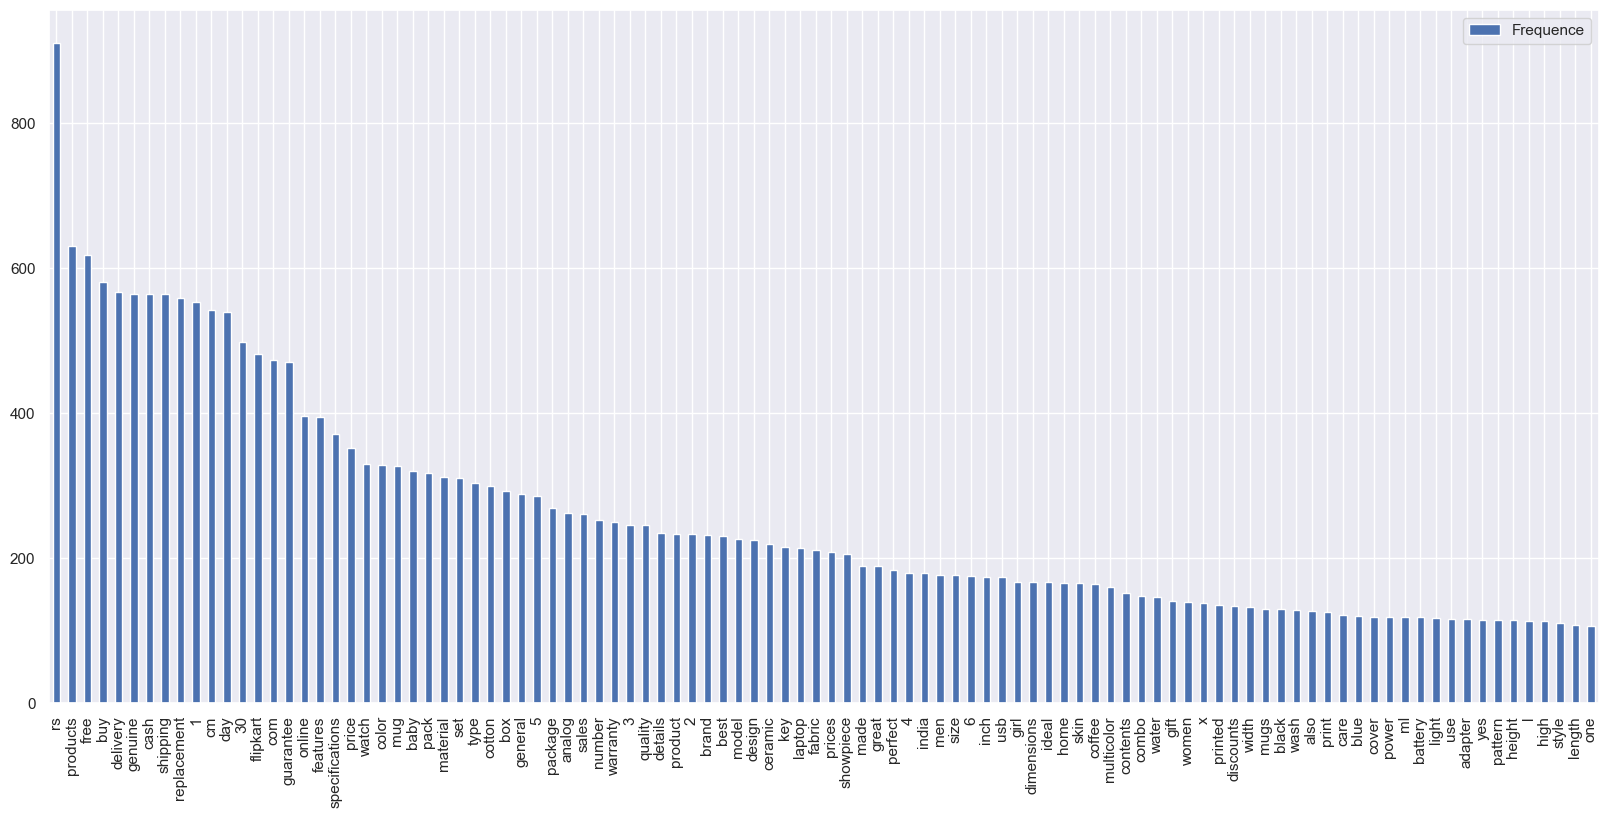

In [79]:
fig, ax = plt.subplots(1,1, figsize = (20, 9))
freqMots.head(100).plot(kind='bar',ax = ax);
# 400

In [80]:
freqMots.head(100)

,Frequence
rs,911
products,631
free,618
buy,581
delivery,567
genuine,564
cash,564
shipping,564
replacement,559
1,554


In [81]:
## Add most freqency words to stop words
stop_words.update(set(freqMots.loc[freqMots.Frequence>351].index))

## Add rare words to list of stopwords
stop_words.update(set(freqMots.loc[freqMots.Frequence<=1].index) )

#### <b><font color='teal'> Cleaning Function </font></b>

In [83]:
raw_corpus = " ".join(df.description.values )
display_tokens_info(word_tokenize(raw_corpus.lower()))

nb tokens 91561, nb tokens uniques 6625
['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', ',', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '(', '213', 'cm', 'in', 'height', ',', 'pack', 'of', '2', ')']


In [84]:
display_tokens_info(RegexpTokenizer(r"\w+").tokenize(raw_corpus.lower()))

nb tokens 81563, nb tokens uniques 6085
['key', 'features', 'of', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'in', 'height', 'pack', 'of', '2', 'price', 'rs', '899', 'this']


In [85]:
tmp = pd.Series(RegexpTokenizer(r"\w+").tokenize(raw_corpus.lower()))
tmp.value_counts()

of            1751
for           1436
the           1369
and           1332
to            1058
              ... 
driver           1
656              1
motif            1
hargunz          1
correction       1
Length: 6085, dtype: int64

In [86]:
tmp.value_counts().describe()

count    6085.000000
mean       13.403944
std        64.604442
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max      1751.000000
dtype: float64

#### <b><font color='teal'> Create 2nd function Cleaning Function</font></b> 

In [87]:
def tokenizer_process_text(doc, _tokenizer = RegexpTokenizer(r"\w+").tokenize) :
    """ Tokenizer of document or string 
    
    positional arguments :
    -----------------------
    doc : str : the document (aka a text in str format) to process
    
    function :
    -----------------------
    func_tokenizer : func : function that tokenize the doc    
    
    """
    return _tokenizer(doc)

In [88]:
def stemm_or_lemm_process_text(token, stemm_or_lemm = '') :
    """ apply a lemmatizer or a stemmatizer on a token """
    
    if stemm_or_lemm == 'stemm' :
        stemmer = EnglishStemmer()
        clean_token = stemmer.stem(token)
        
    elif stemm_or_lemm == 'lemm' :
        WordNetLem = WordNetLemmatizer()
        clean_token = WordNetlem.lemmatize(token)
        
    else :
        clean_token = token
        print("No lemmizer or stemmizer process applied")
    
    return clean_token

In [89]:
def language_words_filter( tokens, lang_words, _force_lang = False,  _stemm_or_lemm = '' ):
    """ Select only words of the language 
    
    positional arguments :
    -----------------------
    tokens         : list of str : the tokenize document to process
    lang_words     : list of str : list of all language words
    _force_is_lang :    bool     : if True apply a filter on tokens that remains only words of lang_words
    
    function arguments :
    ------------------------
    _func_stemm_or_lemm : a stemmizer or a lemmizer
    
    """
    if _force_lang  : 
        lang_words = [ stemm_or_lemm_process_text(token=w, stemm_or_lemm = _stemm_or_lemm) for w in set(lang_words)]
        lang_text = [i for i in tokens if i in lang_words]
    else :
        lang_text = tokens
    
    return lang_text

In [90]:
def tokens_filter(tokens, 
                 _stop_words,
                 _min_len_word = 3, 
                 _is_alpha = True,
                 _is_ascii = True) :
    """ Filter tokens 
    
    positional arguments :
    -----------------------
    tokens : list : list of tokens to process
    
    
    opt args : 
    -----------------------
    min_len_word   :  int  : the mininmum length of words to not exclude
    force_is_alpha :  bool : if true, exclude all tokens with a numeric character
    force_is_ascii :  bool : if true, exclude all tokens with non ASCII character
    language_words :  list : total list of words we can use 
    _stop_words    :  list : list of all word to drop
    
    return :
    -----------------------
    a list of filtered tokens
    """
    
    # stop words
    cleaned_tokens_list = [ w for w in tokens if w not in _stop_words ]
    
    # no more len words
    more_than_N = [ w for w in cleaned_tokens_list if len(w) >= _min_len_word ]
    
    # only alpha chars
    if _is_alpha :
        alpha_tokens = [ w for w in more_than_N if w.isalpha() ]
    else :
        alpha_tokens = more_than_N
        
    # only ASCII Character
    if _is_ascii :
        ascii_tokens = [ w for w in alpha_tokens if w.isascii() ]
    else :
        ascii_tokens = alpha_tokens
    
    return ascii_tokens

In [91]:
def process_text_final(doc, rejoin = False, min_len_word = 3, 
                       func_tokenizer = RegexpTokenizer(r"\w+").tokenize,
                       force_is_alpha = True, force_is_ascii = True, 
                       stemm_or_lemm = "", 
                       force_is_in_lang = None,
                       stop_words = stop_words,
                       language_words = None):
    """ function of text processing with force_is_alpha
    
    positional arguments :
    -----------------------
    doc : str : the document (aka a text in str format) to process
    
    
    opt args : 
    -----------------------
    rejoin         :  bool :if True return a string else returnthe list of tokens
    min_len_word   :  int  : the mininmum length of words to not exclude
    force_is_alpha :  bool : if true, exclude all tokens with a numeric character
    force_is_ascii :  bool : if true, exclude all tokens with non ASCII character
    stemm_or_lemm  :  str  : if "lemm" do lemmentize else do stemmize
    language_words :  list : total list of words we can use
    
    function :
    -----------------------
    func_tokenizer : func : function that tokenize the doc
    
    
    return :
    -----------------------
    a string (if rejoin is True) or a list of tokens
    
    """
    
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    raw_tokens_list = tokenizer_process_text(doc, _tokenizer = func_tokenizer)
    
    # filter tokens
    # stopwords | len token > min_len_word | keep only alpha | keep only ASCII
    filtered_tokens_list = tokens_filter(tokens = raw_tokens_list, 
                                         _stop_words = stop_words,
                                         _min_len_word = min_len_word, 
                                         _is_alpha = force_is_alpha,
                                         _is_ascii = force_is_ascii
                                        )
    
    # lemmize or stemmize
    lemm_stemm_tokens = [stemm_or_lemm_process_text(token=w, stemm_or_lemm = stemm_or_lemm) for w in filtered_tokens_list]
        
    # keep only Words in language_words
    final_tokens = language_words_filter(lemm_stemm_tokens, 
                                         _force_lang = force_is_in_lang, 
                                         _stemm_or_lemm = stemm_or_lemm,
                                         lang_words = language_words 
                                       )
    
    # string or list
    if rejoin :
        return " ".join( final_tokens )
    
    return final_tokens

In [92]:
%%time
#Appliquer le traitement sur tout le corpus
corpus_final = process_text_final(raw_corpus, rejoin = False, min_len_word = 3, 
                       func_tokenizer = RegexpTokenizer(r"\w+").tokenize,
                       force_is_alpha = True, force_is_ascii = True, 
                       stemm_or_lemm = "stemm", 
                       force_is_in_lang = True,
                       stop_words = stop_words,
                       language_words = words.words())

CPU times: total: 42.1 s
Wall time: 43.5 s


In [93]:
display_tokens_info(corpus_final)

nb tokens 39701, nb tokens uniques 2158
['key', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest', 'fabric', 'eyelet']


### Final Function

In [94]:
def final_clean(doc):
    """ perform our final cleaning """
    new_doc = process_text_final(doc, rejoin = False, 
                                 min_len_word = 3, 
                                 func_tokenizer = RegexpTokenizer(r"\w+").tokenize,
                                 force_is_alpha = True, force_is_ascii = True, 
                                 stemm_or_lemm = "stemm", 
                                 force_is_in_lang = True,
                                 stop_words = stop_words,
                                 language_words = words.words()
                                )
    
    return new_doc



In [95]:
%%time
df.description.sample(5).apply(final_clean)

CPU times: total: 13.8 s
Wall time: 14.2 s


728                                  [red, tabl, runner]
371                                   [wireless, router]
60     [mar, queen, eye, liner, lip, gloss, eyelin, s...
386          [french, man, year, deodor, gift, set, set]
278    [analog, watch, girl, general, type, analog, s...
Name: description, dtype: object

### Apply function process_text_final

### Perform parallele_apply function

In [96]:
def process_text_final_parallele2(doc, rejoin = False,stemm_or_lemm = ''):
    """ function of text processing with force_is_alpha
    
    positional arguments :
    -----------------------
    doc : str : the document (aka a text in str format) to process
    
    
    opt args : 
    -----------------------
    rejoin         :  bool :if True return a string else returnthe list of tokens
    min_len_word   :  int  : the mininmum length of words to not exclude
    force_is_alpha :  bool : if true, exclude all tokens with a numeric character
    force_is_ascii :  bool : if true, exclude all tokens with non ASCII character
    stemm_or_lemm  :  str  : if "lemm" do lemmentize else do stemmize
    language_words :  list : total list of words we can use
    
    function :
    -----------------------
    func_tokenizer : func : function that tokenize the doc
    
    
    return :
    -----------------------
    a string (if rejoin is True) or a list of tokens
    
    """
    
    from nltk.stem.snowball import EnglishStemmer
    from nltk.stem import WordNetLemmatizer, PorterStemmer
    from nltk.tokenize import RegexpTokenizer
    from nltk.corpus import words, stopwords
    import spacy, re ,pickle
    
    with open('stop_words.pkl', 'rb') as f:
        stop_words = pickle.load(f) # deserialize using load()
    
    # lower
    doc = doc.lower().strip()
    
    # tokenize
    raw_tokens_list = RegexpTokenizer(r"\w+").tokenize(doc)
    
    # stop words
    cleaned_tokens_list = [ w for w in raw_tokens_list if w not in stop_words ]
    
    # no more len words
    more_than_N = [ w for w in cleaned_tokens_list if len(w) >= 3 ]
    
    # only alpha chars
    alpha_tokens = [ w for w in more_than_N if w.isalpha() ]
        
    # only ASCII Character
    ascii_tokens = [ w for w in alpha_tokens if w.isascii() ]
    
    # keep only Words in language_words
    lang_text = [i for i in ascii_tokens if i in set(words.words())]     
        
    # Stemming or lemmatizing
    if stemm_or_lemm == 'stemm' :
        stemmer = EnglishStemmer()
        clean_token = [ stemmer.stem(w) for w in lang_text ]
        
    elif stemm_or_lemm == 'lemm' :
        WordNetLem = WordNetLemmatizer()
        clean_token = clean_token = [ WordNetlem.lemmatize(w) for w in lang_text ]
        
    else :
        clean_token = lang_text
        
    #################################################################
    
       
    
    if rejoin :
        return " ".join( clean_token )
    
    return clean_token

In [97]:
%%time
df['description_clean'] = df.description\
.parallel_apply(process_text_final_parallele2)

CPU times: total: 297 ms
Wall time: 35min 2s


In [99]:
df[["uniq_id","image","description","description_clean","cat_1"]].to_csv('data/cleaned/description_cleaned.csv',index = False)

import pickle 
with open('data/cleaned/description_cleaned.pkl', 'wb') as f:  # open a text file
    pickle.dump(df[["uniq_id","image","description","description_clean","cat_1"]], f) # serialize the list
f.close()

</br>

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

</br>

In [107]:
import pickle 
with open('data/cleaned/description_cleaned.pkl', 'rb') as f1:
    df2 = pickle.load(f1)
df2.head()

,uniq_id,description,cat_1,description_clean
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,home furnishing,"[key, elegance, polyester, multicolor, abstrac..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,baby care,"[cotton, bath, towel, bath, towel, red, yellow..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,baby care,"[key, cotton, terry, face, towel, set, size, s..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,home furnishing,"[key, royal, fashion, cotton, printed, king, s..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,home furnishing,"[key, print, cotton, floral, king, sized, doub..."


In [105]:
df1 = pd.read_csv('data/cleaned/description_cleaned.csv')
df1.head()

,uniq_id,description,cat_1,description_clean
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,home furnishing,"['key', 'elegance', 'polyester', 'multicolor',..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,baby care,"['cotton', 'bath', 'towel', 'bath', 'towel', '..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,baby care,"['key', 'cotton', 'terry', 'face', 'towel', 's..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,home furnishing,"['key', 'royal', 'fashion', 'cotton', 'printed..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,home furnishing,"['key', 'print', 'cotton', 'floral', 'king', '..."


In [90]:
df.description[843]

'Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219 online. Epresent Mfan 1 Fan USB USB Fan at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.'

# <a name="C4"><font color='green'>**Partie 4 : EDA**</font></a> 

### <a name="C41"><font color='green'>4.1 Bag Of Words </font></a> 

#### <a name="C411"><font color='green'>4.1.a 1-gram </font></a> 

### Bag of Words

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(input='content', # the input is expected to be a sequence of items that can be of type string or byte
                             encoding='utf-8', 
                             decode_error='replace', 
                             strip_accents='ascii', # Remove accents and perform other character normalization during the preprocessing step.
                             lowercase=True, # Convert all characters to lowercase before tokenizing
                             preprocessor=None, tokenizer=None, 
                             stop_words='english', 
                             #token_pattern = r"(?u)\b[a-zA-Z]+\b", #ascii only alpha
                             ngram_range=(1, 1), 
                             analyzer='word', 
                             max_df=0.95, min_df=2, #0.0013, # < 1.5/1050
                             max_features=None,
                             vocabulary=None, binary=False )

X = vectorizer.fit_transform( df.description )

BOW = pd.DataFrame( X.toarray(), columns=vectorizer.get_feature_names() )

BOW.head()

C:\Users\eleor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,001,005,01,03,04,05tg,06,085,099,10,...,yes,york,young,youth,youthful,yuva,zero,zipper,zone,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### <a name="C412"><font color='green'>4.1.b TF IDF </font></a> 

### TF-IDF

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    input='content', # the input is expected to be a sequence of items that can be of type string or byte
    encoding='utf-8', 
    decode_error='replace', 
    strip_accents='ascii', # Remove accents and perform other character normalization during the preprocessing step.
    lowercase=True, # Convert all characters to lowercase before tokenizing
    preprocessor=None, 
    stop_words="english", 
    #token_pattern = r"(?u)\b[a-zA-Z]+\b", #ascii only alpha
    tokenizer = RegexpTokenizer(r"[a-zA-Z]{3,}").tokenize,
    ngram_range=(1, 1), 
    analyzer='word', 
    max_df=0.95, min_df=2, # < 1.5/1050
    max_features=None,
    vocabulary=None, binary=False ,
    smooth_idf = True
    )
tfidf_values = tfidf.fit_transform(df.description)

TFIDF_df = pd.DataFrame(tfidf_values.toarray(),columns=tfidf.get_feature_names())

TFIDF_df.head()

C:\Users\eleor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aapno,abkl,able,abode,absorbency,absorbent,abstract,abstracts,accent,access,...,yes,york,young,youth,youthful,yuva,zero,zipper,zone,zyxel
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.188306,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.075789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.077257,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.043079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.034890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <a name="C42"><font color='green'>4.2 Modélisez des sujets avec des méthodes non supervisées </font></a> 

#### <a name="C421"><font color='green'>4.2.a Latent Dirichlet Allocation (LDA) </font></a> 

In [107]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 20

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(BOW)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=20, random_state=0)

In [108]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names(), no_top_words)

Topic 0:
buddha formula tag 36 swiss crystal scratch exotic statue feature
Topic 1:
usb light led flexible port power portable keyboard fan hub
Topic 2:
hair traits shampoo ml ideal type quantity conditioner 250 men
Topic 3:
skin oil fragrance antiqueshop soaps anti price great lasting liquid
Topic 4:
43 relaxing ganesha 11 cm exotic cover india sheet floral
Topic 5:
corporate 24 855 vrct similar archies 594 adapters edimax massage
Topic 6:
bowl bowls gold handmade set shop stoneware clothes traditional huge
Topic 7:
quilt single bed traditional indian velvet fine handmade work mdf
Topic 8:
mug ceramic sticker perfect coffee wall mugs home gift material
Topic 9:
steel art pizza stainless cutter high kitchen quality glass copper
Topic 10:
cm cover cushion home wooden cushions 40 inch look decor
Topic 11:
warranty laptop adapter battery cm product replacement power quality showpiece
Topic 12:
products free rs delivery buy genuine shipping cash 30 day
Topic 13:
cm baby pack cotton feature

C:\Users\eleor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [97]:
df.cat_1.value_counts()

home furnishing               150
baby care                     150
watches                       150
home decor & festive needs    150
kitchen & dining              150
beauty and personal care      150
computers                     150
Name: cat_1, dtype: int64

#### <a name="C422"><font color='green'>4.2.b NMF (Negative Matrix Factorisation) </font></a> 

In [117]:
from sklearn.decomposition import NMF

# NMF is able to use tf-idf
no_topics = 15

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit(tfidf_values)

no_top_words = 10
display_topics(nmf, tfidf.get_feature_names(), no_top_words)

Topic 0:
com flipkart genuine shipping cash delivery products free guarantee buy
Topic 1:
watch analog men discounts india great boys online women sonata
Topic 2:
baby girl details fabric dress boy cotton sleeve neck shirt
Topic 3:
rockmantra mug ceramic permanent stays porcelain crafting thrilling ensuring start
Topic 4:
showpiece best prices online guarantee replacement day shipping cash genuine
Topic 5:
pack polyester design eyelet color inch model package box sales
Topic 6:
skin laptop shapes mouse print pad warranty inches combo multicolor
Topic 7:
mug coffee ceramic tea prithish printland perfect presented wardrobe morning
Topic 8:
battery cell laptop pavilion lapguard replacement rega guarantee day compatible
Topic 9:
usb led light hub bulb flexible portable port fan power
Topic 10:
towel bath cotton towels soft face hand terry free shipping
Topic 11:
abstract blanket single double com flipkart quilts comforters buy shipping
Topic 12:
mugs bring coffee perfect mug quote talking 

C:\Users\eleor\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
C:\Users\eleor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### <a name="C43"><font color='green'>4.3 Effectuez des plongements de mots (word embeddings) </font></a> 

### Parametres utiles

In [176]:
l_cat = list(set(df['cat_2']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df.iloc[i]['cat_2'])) for i in range(len(df))]

catégories :  ['laptop accessories', 'containers & bottles', 'body and skin care', 'curtains & accessories', 'table decor & handicrafts', 'computer peripherals', 'infant wear', 'dinnerware & crockery', 'baby bath & skin', 'cushions, pillows & covers', 'jmd home furnishing', 'bar & glassware', 'laptops', 'flowers, plants & vases', 'decorative lighting & lamps', 'bed linen', 'combos and kits', 'bath and spa', 'baby bedding', 'living', 'housekeeping & laundry', 'beauty accessories', "women's hygiene", 'diapering & potty training', 'baby grooming', 'pressure cookers & pans', 'eye care', 'storage', 'showpiece', 'consumables & disposables', "kripa's home furnishing", 'true home decor & festive needs"]', 'wrist watches', 'floor coverings', 'candles & fragrances', 'showpieces', 'religion & devotion', 'furniture & furnishings', 'network components', 'garden & leisure', "men's grooming", 'tablet accessories', 'bath linen', 'kitchen tools', 'clocks', 'lighting', 'software', 'feeding & nursing', '

### Fonctions communes

In [177]:
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)


In [178]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text


df['sentence_bow_lem'] = df['description'].apply(lambda x : transform_bow_lem_fct(x))
df['sentence_dl'] = df['description'].apply(lambda x : transform_dl_fct(x))

#### <a name="C431"><font color='green'>4.3.a Word2Vec </font></a> 

In [179]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

### Création du modèle Word2Vec

In [180]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = df['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [181]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4712
Word2Vec trained


In [182]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


### Creation de la matrice d'embedding

In [183]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4713, 300)


In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names(), no_top_words)

In [ ]:
for topic_idx, topic in enumerate(embedding_matrix):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

### Création du modèle d'embedding

In [184]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 24, 300)           1413900   
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


## Exécution du modèle

In [185]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


(1050, 300)

In [186]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.2961 time :  10.0


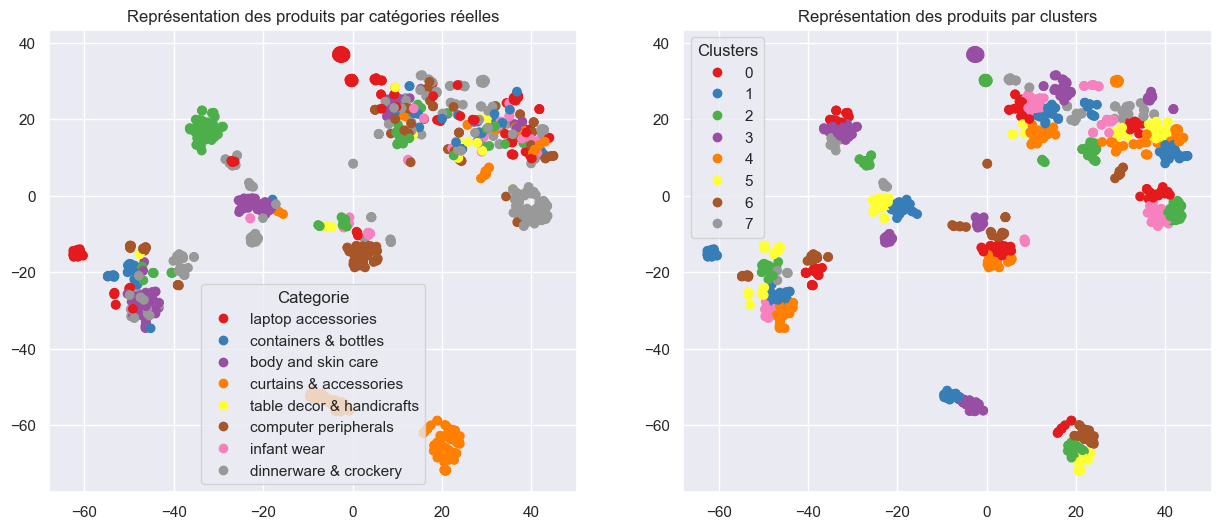

ARI :  0.2961


In [187]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

#### <a name="C432"><font color='green'>4.3.b BERT </font></a> 

In [141]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
#from transformers import *

os.environ["TF_KERAS"]='1'

In [142]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
False


### Fonctions communes

In [167]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = transformers.AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

### 'bert-base-uncased'

In [163]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = transformers.TFAutoModel.from_pretrained(model_type)
sentences = df['sentence_dl'].to_list()

loading configuration file config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

loading weights file tf_model.h5 from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\tf_model.h5
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further

In [168]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

loading configuration file config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

loading file vocab.txt from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab.txt
loading file tokenizer.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\tokenizer_config.json
loading configuration file config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient

1/1 [==============================] - 1s 795ms/step
temps traitement :  108.0


In [169]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3281 time :  7.0


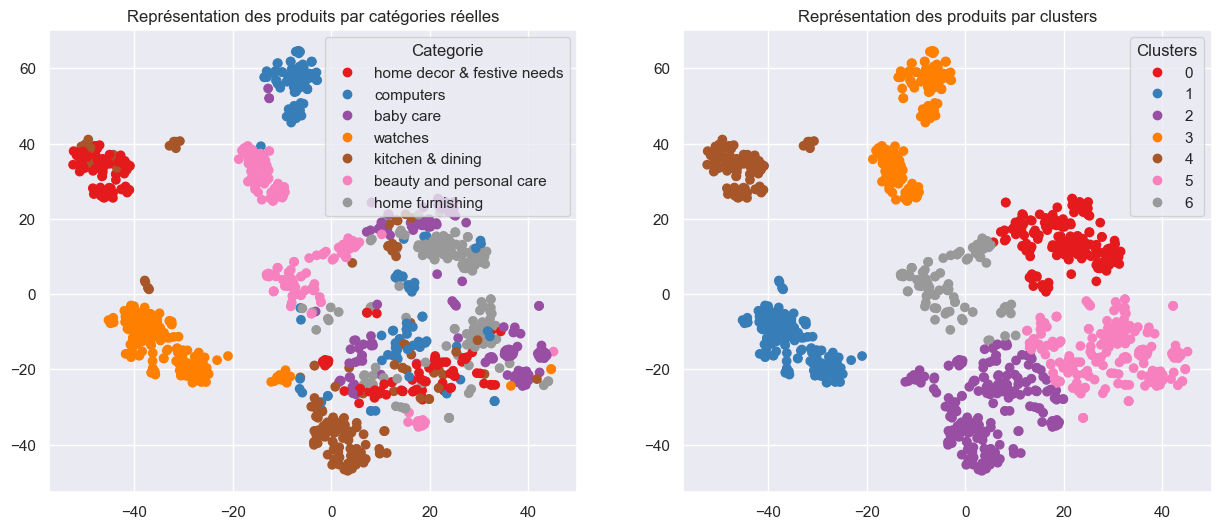

ARI :  0.3281


In [170]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### 'cardiffnlp/twitter-roberta-base-sentiment'
* Modèle pré-entraîné sur des tweets pour l'analyse de sentiment = particulièrement adapté au contexte

In [171]:
max_length = 64
batch_size = 10
model_type = 'cardiffnlp/twitter-roberta-base-sentiment'
model = transformers.TFAutoModel.from_pretrained(model_type)
sentences = df['sentence_dl'].to_list()

loading configuration file config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

loading weights file tf_model.h5 from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\tf_model.h5
Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was tr

In [172]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

loading file vocab.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\vocab.json
loading file merges.txt from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\merges.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\special_tokens_map.json
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at C:\Users\eleor/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\config.json
Model config RobertaConfig {
  "_name_or_path": "ca

1/1 [==============================] - 1s 741ms/step
temps traitement :  96.0


In [173]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.2285 time :  7.0


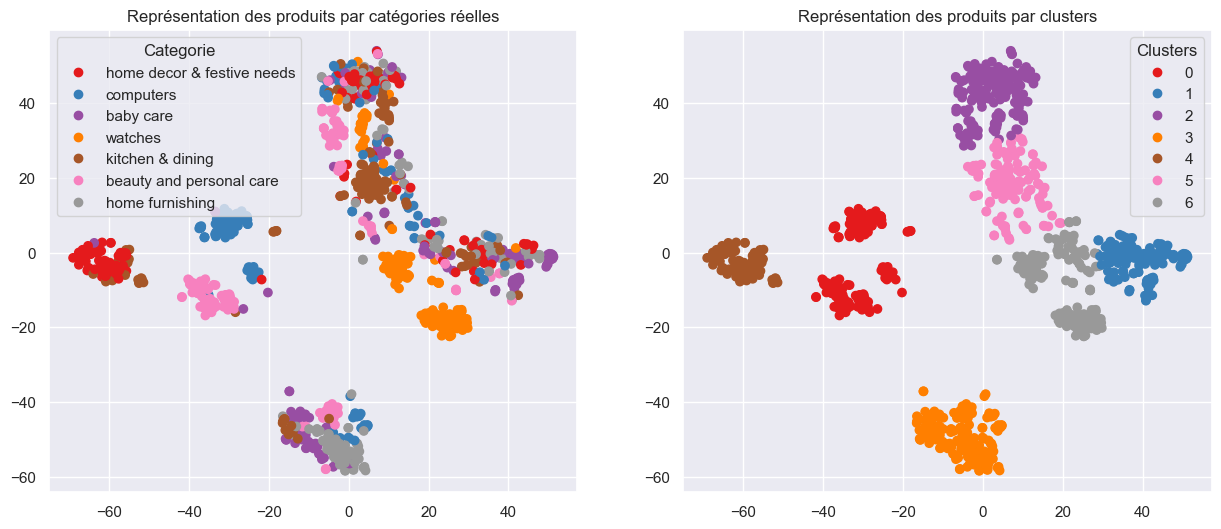

ARI :  0.2285


In [174]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

#### <a name="C433"><font color='green'>4.3.c # USE - Universal Sentence Encoder </font></a> 

In [149]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
#from transformers import *

os.environ["TF_KERAS"]='1'

In [150]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
False


In [159]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [152]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [156]:
df.head()

,uniq_id,description,cat_1,cat_2,cat_3,sentence_bow_lem,sentence_dl
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,home furnishing,curtains & accessories,curtains,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,baby care,baby bath & skin,baby bath towels,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,baby care,baby bath & skin,baby bath towels,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,home furnishing,bed linen,bedsheets,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,home furnishing,bed linen,bedsheets,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...


In [157]:
batch_size = 10
sentences = df['sentence_dl'].to_list()

In [160]:
features_USE = feature_USE_fct(sentences, batch_size)

In [161]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4318 time :  6.0


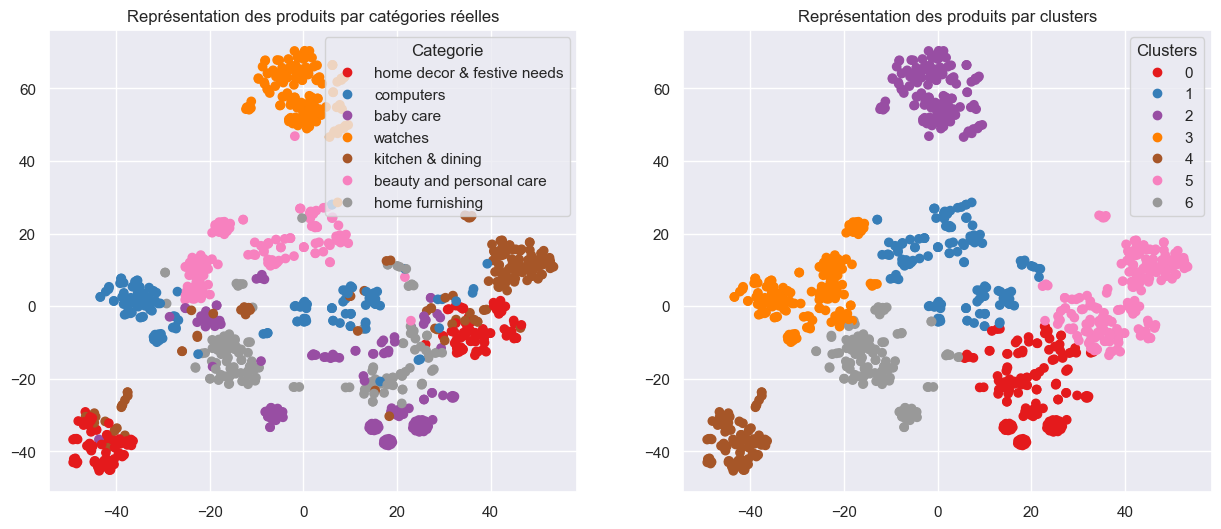

ARI :  0.4318


In [162]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# <a name="C5"><font color='pink'>**Partie 5 : Clustering de Text**</font></a> 

### <a name="C51"><font color='pink'>5.1 Bag Of Words </font></a> 

### <a name="C52"><font color='pink'>5.2 Word2Vec </font></a> 

In [194]:
def clean_text(text, tokenizer, stopwords):
    """Pre-process text and generate tokens

    Args:
        text: Text to tokenize.

    Returns:
        Tokenized text.
    """
    import string
    
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation

    tokens = tokenizer(text)  # Get tokens from text
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens


In [195]:
custom_stopwords = stop_words
text_columns = ['uniq_id','description','cat_1','cat_2']

df_raw = df.copy()
df_raw = df_raw[['uniq_id','description','cat_1','cat_2']].drop_duplicates().dropna()

# Create text column based on title, description, and content
#df["text"] = df[text_columns].apply(lambda x: " | ".join(x), axis=1)
df_raw["tokens"] = df_raw["description"].map(lambda x: clean_text(x, word_tokenize, custom_stopwords))

# Remove duplicated after preprocessing
_, idx = np.unique(df_raw["tokens"], return_index=True)
df_raw = df_raw.iloc[idx, :]

# Remove empty values and keep relevant columns
df_raw = df_raw.loc[df_raw.tokens.map(lambda x: len(x) > 0), ["description", "tokens"]]

docs = df_raw["description"].values
tokenized_docs = df_raw["tokens"].values

print(f"Original dataframe: {df.shape}")
print(f"Pre-processed dataframe: {df_raw.shape}")

Original dataframe: (1050, 7)
Pre-processed dataframe: (1009, 2)


In [197]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(tokenized_docs, model=w2v_model)
len(vectorized_docs), len(vectorized_docs[0])

(1009, 300)

In [198]:
def mbkmeans_clusters(
    X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [205]:
dic_silouhette_coef = dict()
for i in range(2,67):
    clustering, cluster_labels = mbkmeans_clusters( X=vectorized_docs,    k=i,    mb=500,    
                                                   print_silhouette_values=False,)
    
    dic_silouhette_coef[i] = {'silhouette' : silhouette_score(vectorized_docs, cluster_labels),
                             'inertia':clustering.inertia_}

C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 2
Silhouette coefficient: 0.19
Inertia:44361.87283422577


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 3
Silhouette coefficient: 0.19
Inertia:37374.56464349662


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 4
Silhouette coefficient: 0.17
Inertia:34483.90121387908


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 5
Silhouette coefficient: 0.21
Inertia:31079.250368198638


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 6
Silhouette coefficient: 0.20
Inertia:29492.423440917013


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 7
Silhouette coefficient: 0.20
Inertia:28038.150952583594


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 8
Silhouette coefficient: 0.22
Inertia:25962.861885558093


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 9
Silhouette coefficient: 0.21
Inertia:25028.718650194514


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 10
Silhouette coefficient: 0.19
Inertia:24703.450723812508


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 11
Silhouette coefficient: 0.21
Inertia:24426.463712134686


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 12
Silhouette coefficient: 0.21
Inertia:22495.952947825506


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 13
Silhouette coefficient: 0.20
Inertia:22174.712369575416


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 14
Silhouette coefficient: 0.22
Inertia:20734.586835435344


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 15
Silhouette coefficient: 0.24
Inertia:20761.856379732664


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 16
Silhouette coefficient: 0.23
Inertia:19551.345691321443


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 17
Silhouette coefficient: 0.23
Inertia:19020.145922859207


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 18
Silhouette coefficient: 0.23
Inertia:19037.902531913027


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 19
Silhouette coefficient: 0.21
Inertia:18876.5367607999


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 20
Silhouette coefficient: 0.22
Inertia:18101.41434549377


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 21
Silhouette coefficient: 0.22
Inertia:17719.43759604489


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 22
Silhouette coefficient: 0.21
Inertia:17815.997290365573


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 23
Silhouette coefficient: 0.22
Inertia:17447.46531971865


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 24
Silhouette coefficient: 0.21
Inertia:17159.484568009353


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 25
Silhouette coefficient: 0.22
Inertia:16570.99080692874


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 26
Silhouette coefficient: 0.24
Inertia:16040.041557692799


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 27
Silhouette coefficient: 0.24
Inertia:15680.330915381808


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 28
Silhouette coefficient: 0.23
Inertia:15702.12790508414


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 29
Silhouette coefficient: 0.24
Inertia:15475.516867319395


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 30
Silhouette coefficient: 0.23
Inertia:15293.767954562742


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 31
Silhouette coefficient: 0.25
Inertia:14856.153374752883


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 32
Silhouette coefficient: 0.23
Inertia:15108.975697417876


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 33
Silhouette coefficient: 0.24
Inertia:14477.622135844273


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 34
Silhouette coefficient: 0.23
Inertia:14222.583166500595


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 35
Silhouette coefficient: 0.22
Inertia:14009.461027000498


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 36
Silhouette coefficient: 0.23
Inertia:13824.943813775311


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 37
Silhouette coefficient: 0.24
Inertia:13820.814410134804


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 38
Silhouette coefficient: 0.21
Inertia:13892.01517029246


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 39
Silhouette coefficient: 0.22
Inertia:13545.69792782954


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 40
Silhouette coefficient: 0.20
Inertia:13410.117707267234


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 41
Silhouette coefficient: 0.25
Inertia:12920.113990131948


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 42
Silhouette coefficient: 0.23
Inertia:12873.985163671143


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 43
Silhouette coefficient: 0.22
Inertia:12828.646226978044


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 44
Silhouette coefficient: 0.23
Inertia:12526.43653183648


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 45
Silhouette coefficient: 0.23
Inertia:13008.56533181404


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 46
Silhouette coefficient: 0.23
Inertia:11832.574774134251


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 47
Silhouette coefficient: 0.25
Inertia:12286.450284777957


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 48
Silhouette coefficient: 0.24
Inertia:11913.21927175372


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 49
Silhouette coefficient: 0.23
Inertia:11568.92319471752


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 50
Silhouette coefficient: 0.24
Inertia:12076.06284899416


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 51
Silhouette coefficient: 0.22
Inertia:11913.1222323249


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 52
Silhouette coefficient: 0.24
Inertia:11593.965333949984


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 53
Silhouette coefficient: 0.22
Inertia:11356.927911868992


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 54
Silhouette coefficient: 0.24
Inertia:11533.466935314784


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 55
Silhouette coefficient: 0.25
Inertia:11376.564599717098


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 56
Silhouette coefficient: 0.25
Inertia:11665.088164100436


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 57
Silhouette coefficient: 0.24
Inertia:10731.323995873354


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 58
Silhouette coefficient: 0.22
Inertia:11313.66339061366


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 59
Silhouette coefficient: 0.23
Inertia:10725.717881301594


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 60
Silhouette coefficient: 0.25
Inertia:10433.17460618129


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 61
Silhouette coefficient: 0.26
Inertia:10621.870155953118


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 62
Silhouette coefficient: 0.26
Inertia:10375.771991446993


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 63
Silhouette coefficient: 0.23
Inertia:10616.121559090465


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 64
Silhouette coefficient: 0.24
Inertia:10261.39570014098


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 65
Silhouette coefficient: 0.24
Inertia:10353.923568608816


C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 66
Silhouette coefficient: 0.23
Inertia:10450.803343087999


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

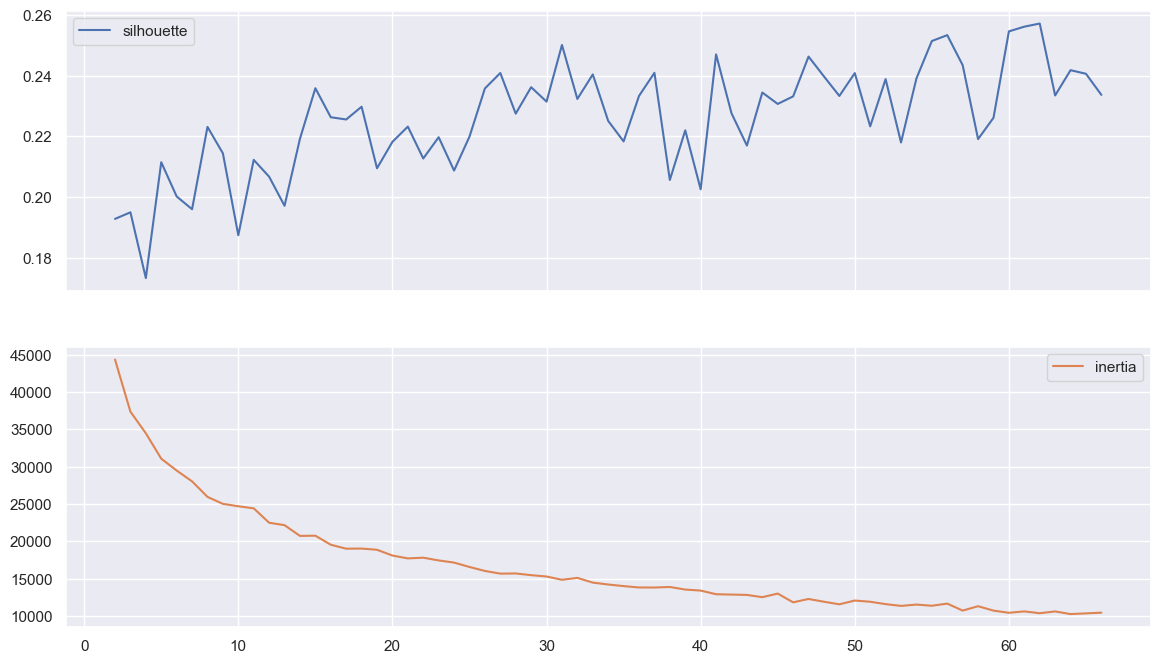

In [211]:
res = pd.DataFrame.from_dict(dic_silouhette_coef,orient='index')
res.plot(subplots=True, figsize=(14,8))

In [212]:
res.loc[res.silhouette == res.silhouette.max()]

,silhouette,inertia
62,0.257244,10375.771991


In [213]:
clustering, cluster_labels = mbkmeans_clusters( X=vectorized_docs,    k=62,    mb=500,    print_silhouette_values=True,)
df_clusters = pd.DataFrame({
    "description": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels
})

C:\Users\eleor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 62
Silhouette coefficient: 0.24
Inertia:10510.244267989096
Silhouette values:
    Cluster 44: Size:2 | Avg:0.96 | Min:0.96 | Max: 0.96
    Cluster 29: Size:20 | Avg:0.92 | Min:0.88 | Max: 0.95
    Cluster 20: Size:11 | Avg:0.81 | Min:0.48 | Max: 0.87
    Cluster 50: Size:7 | Avg:0.78 | Min:0.69 | Max: 0.82
    Cluster 15: Size:17 | Avg:0.70 | Min:0.26 | Max: 0.79
    Cluster 43: Size:12 | Avg:0.68 | Min:0.17 | Max: 0.78
    Cluster 39: Size:9 | Avg:0.61 | Min:0.31 | Max: 0.69
    Cluster 22: Size:5 | Avg:0.60 | Min:0.39 | Max: 0.70
    Cluster 16: Size:14 | Avg:0.60 | Min:0.34 | Max: 0.68
    Cluster 55: Size:8 | Avg:0.52 | Min:0.23 | Max: 0.68
    Cluster 56: Size:9 | Avg:0.48 | Min:0.36 | Max: 0.56
    Cluster 13: Size:41 | Avg:0.47 | Min:0.24 | Max: 0.56
    Cluster 61: Size:7 | Avg:0.46 | Min:0.16 | Max: 0.59
    Cluster 47: Size:18 | Avg:0.46 | Min:0.10 | Max: 0.60
    Cluster 0: Size:4 | Avg:0.45 | Min:0.34 | Max: 0.54
    Cluster 58: Size:4 | Avg:0.43 | Min:0.28

In [214]:
print("Most representative terms per cluster (based on centroids):")
for i in range(50):
    tokens_per_cluster = ""
    most_representative = w2v_model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: combo wild denver engage mxofere 
Cluster 1: baby fabric sleeve striped kurta 
Cluster 2: jewellery vanity pouch makeup earing 
Cluster 3: watch analog men sl dw 
Cluster 4: adapter rega lapguard current acer 
Cluster 5: duvet comfort sapatos exquisite home 
Cluster 6: warranty signal covered speaker domestic 
Cluster 7: showpiece chopra nihar krishna neh 
Cluster 8: single blanket dohar abstract raymond 
Cluster 9: ceramic prithish mug pmr printland 
Cluster 10: spf lowest sunscreen uvshield lotion 
Cluster 11: length number code polyester package 
Cluster 12: led bulb rice ind vrct 
Cluster 13: dial watch india buckle clasp 
Cluster 14: dial stiched strap body dhurrie 
Cluster 15: kadhai anodised kd superchef metallino 
Cluster 16: cell battery rega lapguard dv 
Cluster 17: ceramic capacity mug coffee cm 
Cluster 18: combo set organic nail ice 
Cluster 19: usb plug port wired computer 
Cluster 20: skin mouse pad l

In [215]:
test_cluster = 29
most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_docs - clustering.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:3]:
    print(docs[d])
    print("-------------")

Rockmantra Fantasy ArtRMMW50000330 Ceramic Mug (5.5 l)
                         Price: Rs. 199
				
Size : 3.5" X 4"
Size : 3.5" X 4"
-------------
Rockmantra Colorful Ceramic Mug (5.5 l)
                         Price: Rs. 199
				
Size : 3.5" X 4"
Size : 3.5" X 4"
-------------
Rockmantra Gamming Wallpaper Ceramic Mug (5.5 l)
                         Price: Rs. 349
				
Size : 3.5" X 4"
Size : 3.5" X 4"
-------------


Wall time: 7.64 s


Text(0.5, 1.0, 'Indice de Davies Bouldin \nMinimum atteint à k=66')

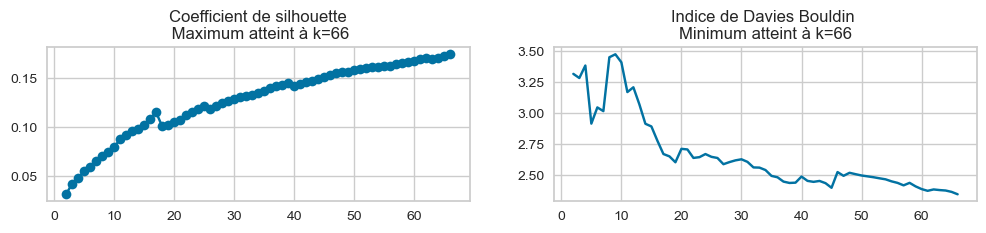

In [198]:
%%time
warnings.filterwarnings("ignore")

silhouette = []
DaviesBouldin = []
N_CLUSTER_TESTER = range(2,67)

Z = linkage(TFIDF_df,method='ward')

# Selection du nombre de cluster K optimal
# 1
for k in N_CLUSTER_TESTER:
    clustersCAH = fcluster(Z, k, criterion='maxclust')
    slh = silhouette_score(TFIDF_df, clustersCAH, metric='euclidean')
    dbi = davies_bouldin_score(TFIDF_df, clustersCAH)
    
    silhouette.append(slh)
    DaviesBouldin.append(dbi)

fig = plt.figure(figsize=(12,2))

ax = fig.add_subplot(121)
ax.plot(N_CLUSTER_TESTER, silhouette,marker='o')
ax.set_title('Coefficient de silhouette\n Maximum atteint à k='+str(N_CLUSTER_TESTER[np.argmax(silhouette)]))


ax = fig.add_subplot(122)
ax.plot(N_CLUSTER_TESTER, DaviesBouldin,marker='1')
ax.set_title('Indice de Davies Bouldin \nMinimum atteint à k='+str( N_CLUSTER_TESTER[np.argmin(DaviesBouldin)] ));

#Meilleur regroupement score silhouette max et Indice DB min
# Meilleur se situe au niveau du coude de l'ébolie d'inertie
# best k = 4

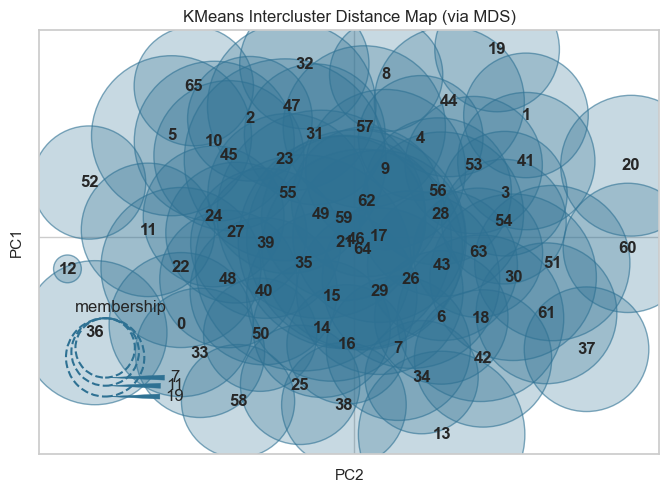

Wall time: 2.66 s


In [200]:
%%time
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans

couleurs = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
_, counts = np.unique(clustersCAH, return_counts=True)


visualizer = intercluster_distance(estimator=KMeans(66, random_state=777),
                                   embedding='mds', X=TFIDF_df)


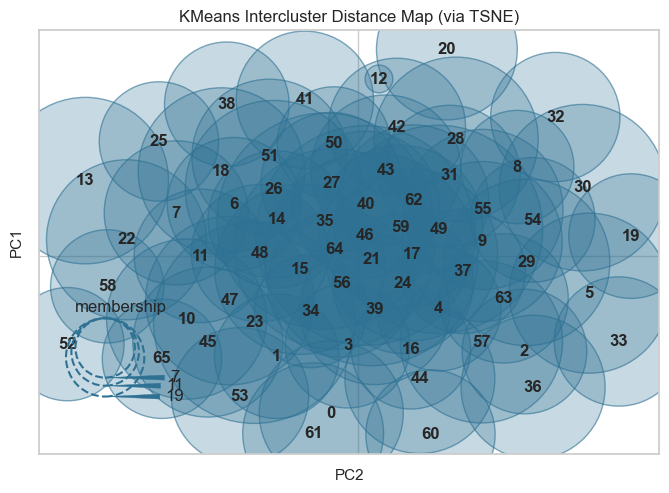

In [201]:

visualizer = intercluster_distance(estimator= KMeans(66, random_state=777),
                                   embedding='tsne', X=TFIDF_df)

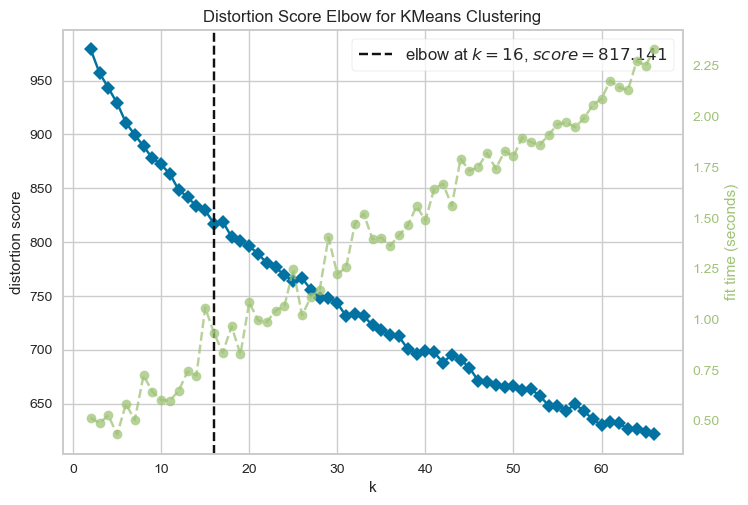

In [202]:
%%time
import matplotlib as mpl 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#mpl.rcParams["figure.figsize"] = (9,6)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,67))

visualizer.fit(TFIDF_df)    # Fit the data to the visualizer
visualizer.poof() ;   # Draw/show/poof the data

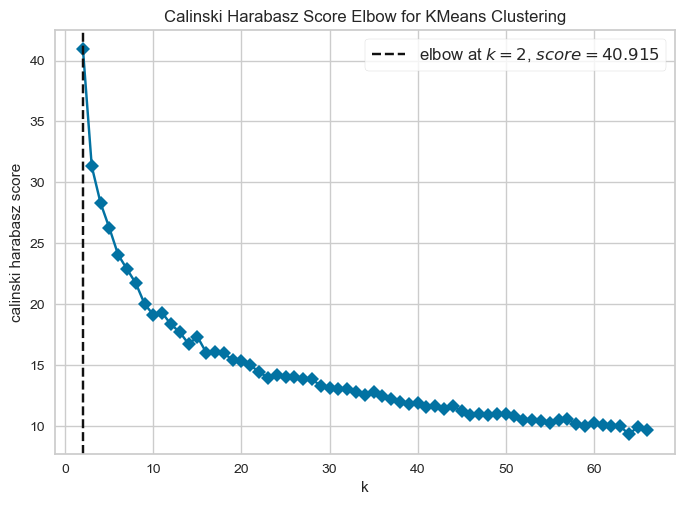

In [203]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,67), metric='calinski_harabasz', timings=False)

visualizer.fit(TFIDF_df)    # Fit the data to the visualizer
visualizer.poof();    # Draw/show/poof the data

2217

In [211]:
df.head()

,uniq_id,description,cat_1,cat_2,cat_3,description_clean
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,home furnishing,curtains & accessories,curtains,"[key, featur, eleg, polyest, multicolor, abstr..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,baby care,baby bath & skin,baby bath towels,"[specif, cotton, bath, towel, bath, towel, red..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,baby care,baby bath & skin,baby bath towels,"[key, featur, cotton, terri, face, towel, set,..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,home furnishing,bed linen,bedsheets,"[key, featur, royal, fashion, cotton, print, k..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,home furnishing,bed linen,bedsheets,"[key, featur, print, cotton, floral, king, siz..."


In [214]:
import warnings
warnings.filterwarnings(action = 'ignore')
 
import gensim
from gensim.models import Word2Vec
 
 
# Create CBOW model
model1 = Word2Vec(df.description_clean,size = 100,
                  min_count = 1,
                  vector_size = 100, 
                  window = 5,
                  workers=3, sg = 0)
 
# Print results
# print("Cosine similarity between 'alice' " + "and 'wonderland' - CBOW : ", model1.wv.similarity('alice', 'wonderland'))    
# print("Cosine similarity between 'alice' " + "and 'machines' - CBOW : ", model1.wv.similarity('alice', 'machines'))
 
# Create CBOW model
model2 = gensim.models.Word2Vec(df.description_clean, min_count = 1, vector_size = 100,  window = 5, sg = 1)
 
# Print results
# print("Cosine similarity between 'alice' " + "and 'wonderland' - Skip Gram : ", model2.wv.similarity('alice', 'wonderland'))   
#print("Cosine similarity between 'alice' " +  "and 'machines' - Skip Gram : ",  model2.wv.similarity('alice', 'machines'))

In [216]:
 model1.wv.similarity('cotton', 'bath')

0.97936153

import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
pyt

# <a name="C4"><font color='green'>**Partie 4 : EDA**</font></a> 

# <a name="C4"><font color='green'>**Partie 4 : Cleaning**</font></a> 

### <a name="C41"><font color='green'>4.1 Encoding object colonnes (LabelEncoding/OrdinalEncoder/OneHotEncoding)</font></a> 

### <a name="C42"><font color='green'>4.2 Rename columns</font></a> 

### <a name="C43"><font color='green'>4.3 Drop useless columns</font></a> 

### <a name="C44"><font color='green'>4.4 Export csv</font></a> 

</br>

</br>

</br>